- Môn học: Thống Kê Nhiều Chiều
- GVHD: Nguyễn Thị Mộng Ngọc
- Họ và Tên: Phạm Thị Hoà
- MSHV: 23C23007


In [1]:
# Thư viện cần dùng trong bài
library(ggplot2)


In [2]:
base_path <- getwd()
setwd(base_path)


# Bài tập 4.21 trang 205 (sách Jonhson)

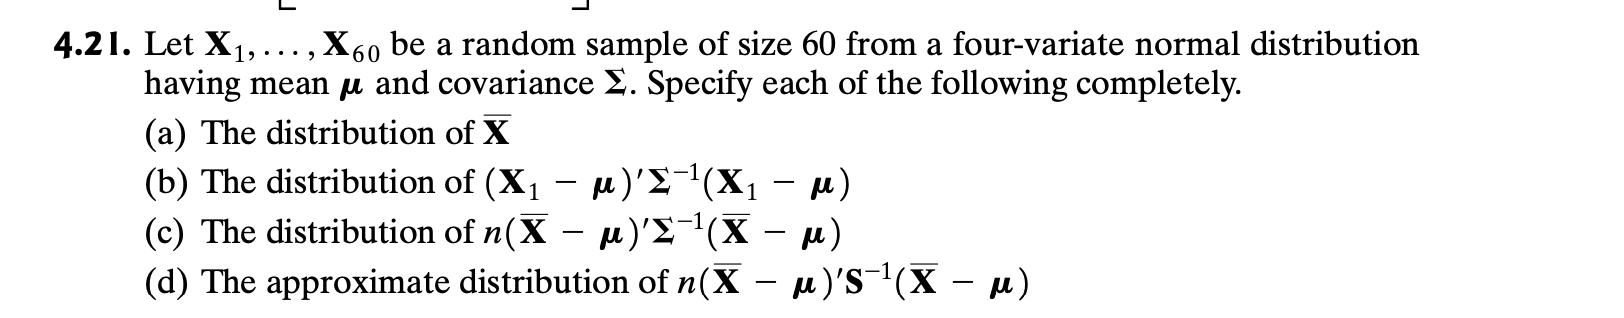


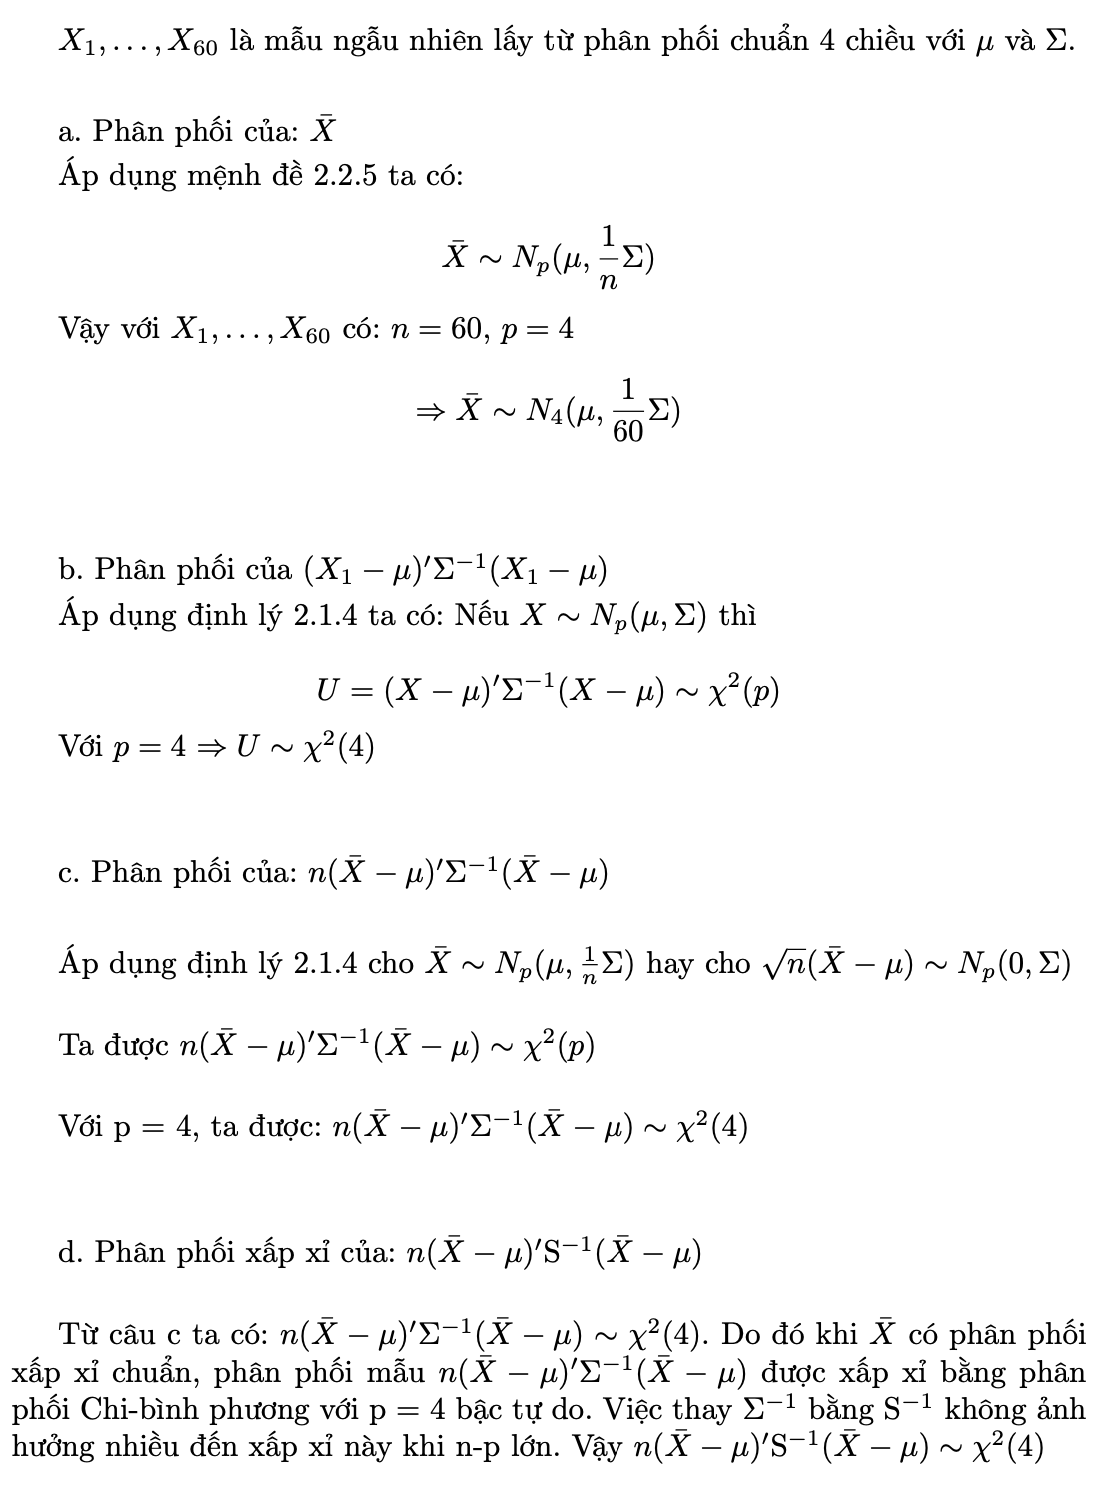


# Bài tập 5.7 - Trang 124 (Sách giáo trình lưu hành nội bộ)


In [3]:
# Đường dẫn lưu trữ dữ liệu
path <- paste(base_path, "../data-PhamThiHoa/VD5-4 (STOCK).dat", sep = "/")
# Gán dữ liệu vào biến df
df <- read.table(path)
# Đặt tên cho cột
names(df) <- c("JPMorgan", "Citibank", "Wells_Fargo", "RDShell", "ExmonMobil")
# Xem 6 dòng đầu tiên của dữ liệu
head(df)


,JPMorgan,Citibank,Wells_Fargo,RDShell,ExmonMobil
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.0130338,-0.0078431,-0.0031889,-0.0447693,0.0052151
2,0.0084862,0.0166886,-0.0062100,0.0119560,0.0134890
3,-0.0179153,-0.0086393,0.0100360,0.0000000,-0.0061428
4,0.0215589,-0.0034858,0.0174353,-0.0285917,-0.0069534
5,0.0108225,0.0037167,-0.0101345,0.0291900,0.0409751
6,0.0101713,-0.0121978,-0.0083768,0.0137083,0.0029895


#### a: Xây dựng ma trận hiệp phương sai S và các thành phần chính tương ứng


In [4]:
# Tính ma trận hiệp phương sai
S <- cov(df)
S


,JPMorgan,Citibank,Wells_Fargo,RDShell,ExmonMobil
JPMorgan,4.332695e-04,0.0002756679,1.590265e-04,6.411929e-05,8.896616e-05
Citibank,2.756679e-04,0.0004387172,1.799737e-04,1.814512e-04,1.232623e-04
Wells_Fargo,1.590265e-04,0.0001799737,2.239722e-04,7.341348e-05,6.054612e-05
RDShell,6.411929e-05,0.0001814512,7.341348e-05,7.224964e-04,5.082772e-04
ExmonMobil,8.896616e-05,0.0001232623,6.054612e-05,5.082772e-04,7.656742e-04


In [5]:
# Thực hiện PCA Thành phần chính
pca_result <- prcomp(df)
pca_result
# Xem kết quả
summary(pca_result)


Standard deviations (1, .., p=5):
[1] 0.03698213 0.02647942 0.01593118 0.01194163 0.01090352

Rotation (n x k) = (5 x 5):
                   PC1        PC2         PC3        PC4         PC5
JPMorgan    -0.2228228 -0.6252260 -0.32611218 -0.6627590 -0.11765952
Citibank    -0.3072900 -0.5703900  0.24959014  0.4140935  0.58860803
Wells_Fargo -0.1548103 -0.3445049  0.03763929  0.4970499 -0.78030428
RDShell     -0.6389680  0.2479475  0.64249741 -0.3088689 -0.14845546
ExmonMobil  -0.6509044  0.3218478 -0.64586064  0.2163758  0.09371777

Importance of components:
                           PC1     PC2     PC3     PC4     PC5
Standard deviation     0.03698 0.02648 0.01593 0.01194 0.01090
Proportion of Variance 0.52926 0.27133 0.09822 0.05518 0.04601
Cumulative Proportion  0.52926 0.80059 0.89881 0.95399 1.00000

- 1. Độ lệch chuẩn của các thành phần chính (Standard deviation)

  - PC1: Độ lệch chuẩn là 0.03698, cho thấy rằng thành phần này có sự phân tán lớn nhất của dữ liệu.
  - PC2: Độ lệch chuẩn là 0.02647942, ít phân tán hơn so với PC1.
  - Các thành phần tiếp theo có độ lệch chuẩn giảm dần, điều này chỉ ra rằng chúng giải thích ít biến thiên hơn trong dữ liệu.

- 2. Tỷ lệ biến thiên (Proportion of Variance)
     Tỷ lệ này cho biết mỗi thành phần chính giải thích bao nhiêu phần trăm của tổng biến thiên trong dữ liệu: - PC1: Giải thích 52.926% tổng biến thiên. - PC2: Giải thích thêm 27.133% biến thiên. - PC3, PC4, và PC5 giải thích lần lượt 9.822%, 5.518%, và 4.601% của tổng biến thiên.

- 3. Tỷ lệ tích lũy (Cumulative Proportion)
     Tỷ lệ tích lũy cho biết tổng phần trăm được giải thích bởi tất cả các thành phần chính từ đầu đến thành phần hiện tại: - Sau PC1: 52.926% tổng biến thiên đã được giải thích. - Sau PC2: Tích lũy đến 80.059%. - Sau PC3: Tích lũy đến 89.881%. - Sau PC4: Tích lũy đến 95.399%. - Sau PC5: Tất cả biến thiên (100%) đã được giải thích.


PC1,PC2,PC3,PC4,PC5
0.031117151,-0.012704104,-0.0383318146,0.0014866803,0.004703966
-0.016571356,-0.006084845,0.0002624437,-0.0025729855,0.014390198
0.014997389,0.009989102,0.0081598959,0.0119567914,-0.010153358
0.022269333,-0.027529927,-0.0209949128,0.0002624549,-0.013369561
-0.041401047,0.014324960,-0.0105642156,-0.0108193621,0.009559704
-0.002020384,0.007139812,0.0003286567,-0.0195415471,-0.002364202


[1] 0.0013676780 0.0007011596 0.0002538024 0.0001426026 0.0001188868

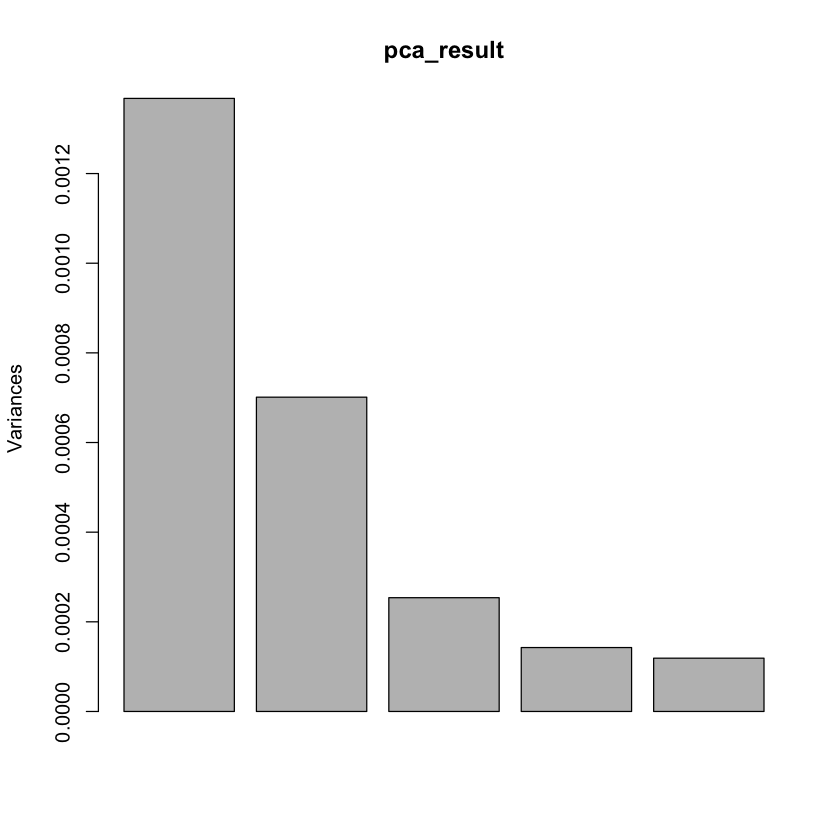

In [6]:
# Các thành phần chính
principal_components <- pca_result$x
head(principal_components)
# Giá trị riêng (variances của các thành phần chính)
eigenvalues <- pca_result$sdev^2
eigenvalues
# Biểu đồ scree để xem sự phân bố của giá trị riêng
plot(pca_result)


#### b. Tính tỷ số đóng góp vào phương sai suy rộng của ba thành phần chính đầu tiên và giải thích ý nghĩa của nó


In [7]:
# Tổng phương sai suy rộng:
tong_pssr <- 0
for (value in pca_result[["sdev"]]) {
    tong_pssr <- tong_pssr + value^2
}
print(paste("Tong phuong sai suy rong:", tong_pssr))
cat("\n")
# # Tỷ số đóng góp của các thành phần chính:
i <- 1
for (value in pca_result[["sdev"]]) {
    tsdg <- (value^2) / tong_pssr
    print(paste("Ty so dong gop cua thanh phan chinh thu", i, ":", tsdg))
    # print("Tỷ số đóng góp của thành phần chính thứ ",i, ": ", tsdg)
    cat("\n")
    i <- i + 1
}


[1] "Tong phuong sai suy rong: 0.00258412943560773"

[1] "Ty so dong gop cua thanh phan chinh thu 1 : 0.529260658391977"

[1] "Ty so dong gop cua thanh phan chinh thu 2 : 0.271332984550781"

[1] "Ty so dong gop cua thanh phan chinh thu 3 : 0.0982158416064456"

[1] "Ty so dong gop cua thanh phan chinh thu 4 : 0.055184000312636"

[1] "Ty so dong gop cua thanh phan chinh thu 5 : 0.0460065151381599"



- Tỷ số đóng góp của mỗi thành phần chính vào phương sai suy rộng cho thấy mức độ mà mỗi thành phần chính giải thích biến thiên trong dữ liệu.
- Trong trường hợp này:
  - PC1 giải thích gần hơn một nửa tổng biến thiên trong dữ liệu, làm nổi bật tầm quan trọng của nó trong việc mô hình hóa dữ liệu.
  - PC2 và PC3 cùng nhau giải thích thêm khoảng 36.95% của biến thiên, với PC2 (27.13%) có ảnh hưởng đáng kể hơn nhiều so với PC3 (9.82%).
  - Việc sử dụng ba thành phần này đã giải thích khoảng 89.88% tổng biến thiên, cho thấy chúng cung cấp một cái nhìn khá toàn diện về dữ liệu mà không cần phải xem xét tất cả các biến gốc. Điều này rất hữu ích trong việc giảm kích thước dữ liệu và trực quan hóa, đồng thời vẫn bảo toàn được phần lớn thông tin quan trọng trong dữ liệu.


#### c. Xây dựng các khoảng tin cậy đồng thời Bonferroni 90% cho các phương sai λ1, λ2, λ3 của ba thành phần chính đầu Y1, Y2, Y3


In [8]:
eigenvalues <- pca_result$sdev^2
eigenvalues


[1] 0.0013676780 0.0007011596 0.0002538024 0.0001426026 0.0001188868

- Trong phần này, tài liệu lưu hành nội bộ đang viết là z((1+gamma)/2), nhưng so sánh với nội dung lý thuyết
  trong sách Jonhson trang 456 và 457 ta thấy rằng, z(alpha/2) = z((1-gamma)/2).
  (Vậy bài này đang thanh khảo lý thuyết trong sách Jonhson, không phải giáo trình lưu hành nội bộ)
  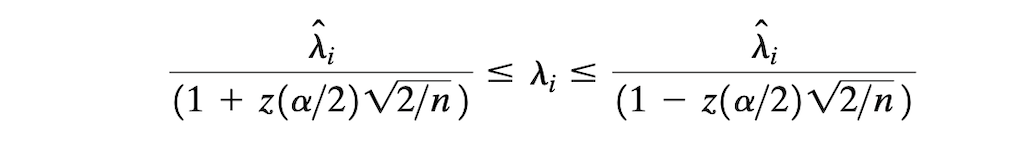


In [9]:
n <- nrow(df) # số lượng mẫu
p <- ncol(df) # số lượng biến ban đầu
# Số lượng thành phần chính
m <- 3 # Số lượng thành phần chính đầu tiên
alpha <- 0.1
gamma <- 1 - alpha
z <- (1 - gamma) / (2 * m)
# Ước tính khoảng tin cậy cho từng giá trị riêng
ci_bounds <- sapply(eigenvalues[1:3], function(lambda) {
    lower <- lambda / (1 + qnorm(z, lower.tail = FALSE) * sqrt(2 / n))
    upper <- lambda / (1 - qnorm(z, lower.tail = FALSE) * sqrt(2 / n))
    c(lower = lower, upper = upper)
})
print(ci_bounds)


             [,1]         [,2]         [,3]
lower 0.001054871 0.0005407946 0.0001957543
upper 0.001944204 0.0009967240 0.0003607895


#### d. Với kết quả trong các phần a-c, đánh giá xem dữ liệu có thể thu gọn xuống ít hơn 5 chiều không? Giải thích


- Bằng cách sử dụng tỷ lệ phương sai toàn phần. Chúng ta có thể thấy từ đầu ra của tóm tắt pca, rằng 3 thành phần chính đầu tiên giải thích cho 89.88% sự biến thiên của dữ liệu. Do đó trong bài toán này chúng ta hoàn toàn có thể rút gọn xuống ít hơn 5 chiều (cụ thể là 3 chiều).


# Bài tập 5.8 - Trang 124 (Giáo trình lưu hành nội bộ)


In [10]:
# Đường dẫn lưu trữ dữ liệu
path <- paste(base_path, "../data-PhamThiHoa/VD5-3.dat", sep = "/")
# Gán dữ liệu vào biến df
df <- read.table(path)
# # Xem 6 dòng đầu tiên của dữ liệu
head(df)


,V1,V2,V3,V4,V5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2.67,5.71,69.02,30.3,1.48
2,2.25,4.37,72.98,43.3,1.44
3,3.12,10.27,64.94,32.0,2.11
4,5.14,7.44,71.29,24.5,1.85
5,5.54,9.25,74.94,31.0,2.23
6,5.04,4.84,53.61,48.2,1.60


In [11]:
# Ma trận hiệp phương sai của df khi chưa nhân cột V5 với 10:
S_old <- cov(df)
S_old


,V1,V2,V3,V4,V5
V1,3.39689902,-1.102139,4.30555484,-2.0782852,0.02720391
V2,-1.10213937,9.672775,-1.51323628,10.9532322,1.20306366
V3,4.30555484,-1.513236,55.62591164,-28.9374642,-0.04355907
V4,-2.07828525,10.953232,-28.93746421,89.0666120,0.95729973
V5,0.02720391,1.203064,-0.04355907,0.9572997,0.31862508


In [12]:
# Tính ma trận tương quan cor_df trước khi nhân cột V5 10 lần, dùng để so sánh với cor sau khi đã nhân cột V5 10 lần ở câu C
cor_old <- cor(-as.matrix(df) %*% eigen(cov(df))$vectors[, 1:2], df)


In [13]:
# Số liệu cột cuối được nhân cho 10
df["V5"] <- df["V5"] * 10
head(df)


,V1,V2,V3,V4,V5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2.67,5.71,69.02,30.3,14.8
2,2.25,4.37,72.98,43.3,14.4
3,3.12,10.27,64.94,32.0,21.1
4,5.14,7.44,71.29,24.5,18.5
5,5.54,9.25,74.94,31.0,22.3
6,5.04,4.84,53.61,48.2,16.0


#### a. Xây dựng ma trận hiệp phương sai S của bộ dữ liệu này. Chứng tỏ rằng S có thể nhận được từ ma trận hiệp phương sai trong ví dụ 3.5. Giải thích


In [14]:
# Ma trận hiệp phương sai:
S <- cov(df)
S


,V1,V2,V3,V4,V5
V1,3.3968990,-1.102139,4.3055548,-2.078285,0.2720391
V2,-1.1021394,9.672775,-1.5132363,10.953232,12.0306366
V3,4.3055548,-1.513236,55.6259116,-28.937464,-0.4355907
V4,-2.0782852,10.953232,-28.9374642,89.066612,9.5729973
V5,0.2720391,12.030637,-0.4355907,9.572997,31.8625082


In [15]:
# Hai ma trận hiệp phương sai cũ và mới:
S_old
S


,V1,V2,V3,V4,V5
V1,3.39689902,-1.102139,4.30555484,-2.0782852,0.02720391
V2,-1.10213937,9.672775,-1.51323628,10.9532322,1.20306366
V3,4.30555484,-1.513236,55.62591164,-28.9374642,-0.04355907
V4,-2.07828525,10.953232,-28.93746421,89.0666120,0.95729973
V5,0.02720391,1.203064,-0.04355907,0.9572997,0.31862508


,V1,V2,V3,V4,V5
V1,3.3968990,-1.102139,4.3055548,-2.078285,0.2720391
V2,-1.1021394,9.672775,-1.5132363,10.953232,12.0306366
V3,4.3055548,-1.513236,55.6259116,-28.937464,-0.4355907
V4,-2.0782852,10.953232,-28.9374642,89.066612,9.5729973
V5,0.2720391,12.030637,-0.4355907,9.572997,31.8625082


- Ma trận hiệp phương sai sẽ cho ta biết mối quan hệ về độ biến thiên giữa các cột với nhau.
- Khi nhân một cột của ma trận với một hằng số, ảnh hưởng đến ma trận hiệp phương sai chỉ xảy ra ở các thành phần liên quan đến cột đó. Cụ thể trong câu này, phương sai của cột đó sẽ tăng lên theo bình phương của hằng số nhân (10^2 = 100 lần) và hiệp phương sai giữa cột đó và các cột khác cũng tăng lên 10 lần.
- Vậy có thể tính ma trận hiệp phương sai sau khi đã nhân cột V5 10 lần bằng cách trên, và điều đó đã được chứng minh đúng khi so sánh hai hiệp phương sai S_old và S ở trên


#### b. xác định các cặp trị riêng, véc tơ riêng và hai thành phần chính đầu tiên cho bởi ma trận hiệp phương sai nhận được từ phần a


In [16]:
# Tính trị riêng và vector riêng
eigen_results <- eigen(S)
eigen_results


eigen() decomposition
$values
[1] 108.271939  43.139674  31.267127   4.598098   2.347868

$vectors
            [,1]        [,2]        [,3]        [,4]        [,5]
[1,]  0.03762881 -0.06230915 -0.03997936 -0.55553173  0.82733777
[2,] -0.11892964 -0.24930105  0.26052476  0.76839232  0.51517455
[3,]  0.47967291 -0.75967654 -0.43064872  0.02807896 -0.08098582
[4,] -0.85891177 -0.31639989 -0.39364417 -0.06867379 -0.04989847
[5,] -0.12893518 -0.50670427  0.76818907 -0.30895506 -0.20262977


In [17]:
# Lấy vector riêng và trị riêng
vectors <- eigen_results$vectors
values <- eigen_results$values
# Lấy hai vector riêng đầu tiên (hai thành phần chính thứ nhất)
PC1 <- vectors[, 1]
PC2 <- vectors[, 2]
# In ra trị riêng và vector riêng cho hai thành phần chính
print("Vector rieng cho PC1:")
print(PC1)
print("Tri rieng cho PC1:")
print(values[1])

print("Vector rieng cho PC2:")
print(PC2)
print("Tri rieng cho PC2:")
print(values[2])


[1] "Vector rieng cho PC1:"
[1]  0.03762881 -0.11892964  0.47967291 -0.85891177 -0.12893518
[1] "Tri rieng cho PC1:"
[1] 108.2719
[1] "Vector rieng cho PC2:"
[1] -0.06230915 -0.24930105 -0.75967654 -0.31639989 -0.50670427
[1] "Tri rieng cho PC2:"
[1] 43.13967


#### c.

- Tính tỷ số đóng góp và phương sai suy rộng của hai thành phần chính đầu tiên nhận được từ câu b. Tính các hệ số tương quan r
- So sánh kết quả nhận được trong ví dụ 5.3. Hỏi việc thay đổi đơn vị đo trên biến có ảnh hưởng tới các thành phần chính hay không


In [18]:
# Tính tổng phương sai suy rộng cho tát cả các thành phần chính
pssr_all <- sum(values)
# Tính tỷ số đóng góp của 2 thành phần chính đầu tiên:
# Trên tất cả các thành
pc1_all <- values[1] / pssr_all
pc2_all <- values[2] / pssr_all
print(paste("Ty le dong gop cua thanh phan 1 tren tong tat ca cac thanh phan: ", pc1_all))
print(paste("Ty le dong gop cua thanh phan 2 tren tong tat ca cac thanh phan: ", pc2_all))


[1] "Ty le dong gop cua thanh phan 1 tren tong tat ca cac thanh phan:  0.570980128970404"
[1] "Ty le dong gop cua thanh phan 2 tren tong tat ca cac thanh phan:  0.227500281067697"


In [19]:
# Tính ma trận hệ số tương quan cor
cor <- cor(-as.matrix(df) %*% eigen(cov(df))$vectors[, 1:2], df)
cor


V1,V2,V3,V4,V5
-0.2124404,0.3978987,-0.6692133,0.946998,0.2376782
0.2220491,0.5264862,0.6690038,0.220200,0.5895939


In [20]:
# So sánh hai ma trận tương quan trước và sau khi nhân cột V5 10 lần:
cor_old
cor


V1,V2,V3,V4,V5
-0.2182675,0.3503211,-0.6829211,0.9460440,0.1671804
0.2431339,0.2627741,0.7299834,0.3205728,0.1645133


V1,V2,V3,V4,V5
-0.2124404,0.3978987,-0.6692133,0.946998,0.2376782
0.2220491,0.5264862,0.6690038,0.220200,0.5895939


##### Nhận xét:

- Ta thấy ma trận hệ số tương quan trước và sau khi nhân cột V5 10 đã có sự khác biệt:
  - V1: Sự thay đổi nhỏ trong hệ số tương quan của PC1 và PC2 cho thấy V1 khá ổn định giữa hai bảng.
  - V2: Có sự tăng rõ rệt trong hệ số tương quan của V2, đặc biệt là với PC2, điều này có thể chỉ ra rằng V2 giờ đây có mối liên hệ mạnh mẽ hơn với thành phần chính thứ hai.
  - V3: Hệ số tương quan của V3 với PC1 ít thay đổi, nhưng sự đảo ngược từ âm sang dương với PC2 là rất đáng chú ý. Điều này có thể do sự thay đổi trong dữ liệu.
  - V4: Hệ số tương quan với PC1 gần như không thay đổi, tuy nhiên sự giảm mạnh với PC2 có thể cho thấy rằng V4 không còn tương quan mạnh mẽ với thành phần chính thứ hai như trước.
  - V5: Sự tăng lớn trong hệ số tương quan với PC2 cho thấy rằng sau khi nhân V5 với 10, biến này có mối tương quan mạnh mẽ hơn nhiều với thành phần chính thứ hai.
- Tổng Kết: Sự thay đổi trong hệ số tương quan cho thấy một số biến có mối liên kết mạnh mẽ hơn hoặc yếu hơn với các thành phần chính sau khi thực hiện các thay đổi về tỷ lệ. Điều này có thể liên quan trực tiếp đến cách các biến được xử lý trong bộ dữ liệu, nhất là đối với V5.
  Điều này đã chỉ ra rằng, rõ ràng sự thay đổi đơn vị đo trên biến có ảnh hưởng tới các thành phần chính


# Bài 5.10 - Trang 125 (Giáo trình lưu hành nội bộ)


In [21]:
# Đường dẫn lưu trữ dữ liệu
path <- paste(base_path, "../data-PhamThiHoa/BT5-10.dat", sep = "/")
# Gán dữ liệu vào biến df
df <- read.table(path)


In [22]:
# Chỉ khảo sát 5 biến đầu:
df <- df[, c("V1", "V2", "V3", "V4", "V5")]
# Đặt tên lại cho cột
names(df) <- c("Indep", "Supp", "Benev", "Conform", "Leader")
head(df)


,Indep,Supp,Benev,Conform,Leader
,<int>,<int>,<int>,<int>,<int>
1,27,13,14,20,11
2,12,13,24,25,6
3,14,20,15,16,7
4,18,20,17,12,6
5,9,22,22,21,6
6,18,15,17,25,9


In [23]:
S <- cov(df)
R <- cor(df)
S
R


,Indep,Supp,Benev,Conform,Leader
Indep,34.750209,-4.2766846,-18.0717949,-15.972868,5.716458
Supp,-4.276685,17.5134168,0.4197973,-7.868217,-8.723315
Benev,-18.071795,0.4197973,29.8447227,9.348837,-13.942159
Conform,-15.972868,-7.8682171,9.3488372,33.042636,-9.941860
Leader,5.716458,-8.7233154,-13.9421586,-9.941860,26.957961


,Indep,Supp,Benev,Conform,Leader
Indep,1.0000000,-0.17335767,-0.56116271,-0.4713753,0.1867690
Supp,-0.1733577,1.00000000,0.01836202,-0.3270797,-0.4014696
Benev,-0.5611627,0.01836202,1.00000000,0.2977052,-0.4915331
Conform,-0.4713753,-0.32707967,0.29770524,1.0000000,-0.3331093
Leader,0.1867690,-0.40146956,-0.49153305,-0.3331093,1.0000000


In [24]:
# Xây dựng thành phần chính cho bởi ma trận phương sai S và ma trận tương quan R
# Với pc1: Dữ liệu chưa chuẩn hoá (ma trận hiệp phương sai S)
# Với pc2: Dữ liệu đã được chuẩn hoá (ma trận tương quan R)
pca1 <- princomp(df, cor = FALSE)
pca2 <- princomp(df, cor = TRUE)
print("Chua chuan hoa - Ma tran hiep phuong sai S")
summary(pca1, loadings = TRUE)
print("Da chuan hoa - Ma tran tuong quan R")
summary(pca2, loadings = TRUE)


[1] "Chua chuan hoa - Ma tran hiep phuong sai S"


Importance of components:
                          Comp.1    Comp.2    Comp.3   Comp.4     Comp.5
Standard deviation     8.2597530 5.5916560 4.7878255 4.028446 1.54078160
Proportion of Variance 0.4838005 0.2217242 0.1625582 0.115082 0.01683505
Cumulative Proportion  0.4838005 0.7055248 0.8680829 0.983165 1.00000000

Loadings:
        Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
Indep    0.579         0.643  0.309  0.386
Supp            0.612 -0.140 -0.515  0.583
Benev   -0.524  0.219 -0.119  0.734  0.352
Conform -0.493 -0.572  0.422 -0.304  0.398
Leader   0.380 -0.494 -0.612         0.478

[1] "Da chuan hoa - Ma tran tuong quan R"


Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4     Comp.5
Standard deviation     1.4821014 1.1697220 0.8694038 0.7673239 0.30079386
Proportion of Variance 0.4393249 0.2736499 0.1511726 0.1177572 0.01809539
Cumulative Proportion  0.4393249 0.7129748 0.8641474 0.9819046 1.00000000

Loadings:
        Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
Indep    0.521         0.667  0.253  0.460
Supp    -0.121  0.788 -0.187 -0.351  0.454
Benev   -0.548        -0.115  0.733  0.386
Conform -0.439 -0.491  0.295 -0.525  0.451
Leader   0.469 -0.361 -0.648         0.480

#### a. Xác định số các thành phần chính cần thiết để có thể giải thích dữ liệu gốc mà không mất nhiều thông tin. Vẽ scree plot để minh hoạ


- Bằng cách sử dụng tỷ lệ phương sai toàn phần từ kết quả trên ta thấy, từ đầu ra của tóm tắt pca: đối với cả hai thành phần chính được xây dựng dùng trận hiệp phương sai S và ma trận tương quan R đều cho kết quả rằng 3 thành phần chính đầu tiên giải thích được ~ 86% phương sai(86.41474% khi dùng ma trận hiệp phương sai S, 86.80829% khi dùng ma trận tương quan R). Vậy ta quyết định giữ lại 3 thành phần chính đầu tiên


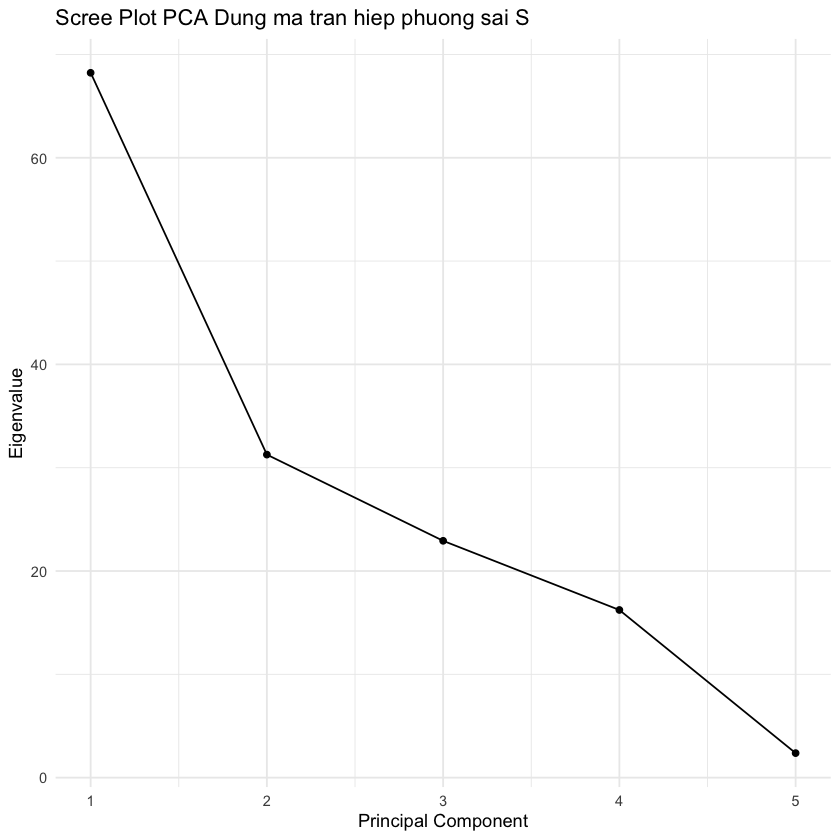

In [25]:
eigen_pca1 <- pca1$sdev^2
# Tạo dataframe cho biểu đồ
scree_1 <- data.frame(
  Component = seq_along(eigen_pca1),
  Eigenvalue = eigen_pca1
)
# Vẽ biểu đồ
ggplot(scree_1, aes(x = Component, y = Eigenvalue)) +
  geom_line() +
  geom_point() +
  labs(
    title = "Scree Plot PCA Dung ma tran hiep phuong sai S",
    x = "Principal Component",
    y = "Eigenvalue"
  ) +
  theme_minimal()


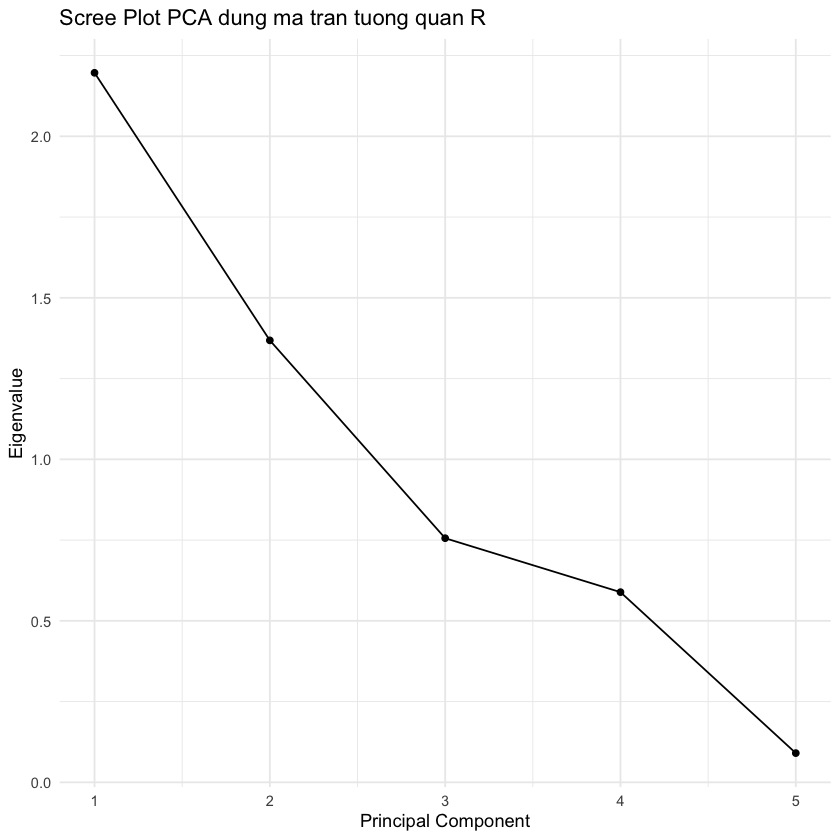

In [26]:
eigen_pca2 <- pca2$sdev^2
# Tạo dataframe cho biểu đồ
scree_2 <- data.frame(
  Component = seq_along(eigen_pca2),
  Eigenvalue = eigen_pca2
)
# Vẽ biểu đồ
ggplot(scree_2, aes(x = Component, y = Eigenvalue)) +
  geom_line() +
  geom_point() +
  labs(
    title = "Scree Plot PCA dung ma tran tuong quan R",
    x = "Principal Component",
    y = "Eigenvalue"
  ) +
  theme_minimal()


#### Nhận xét

- Qua cả hai đồ thị Scree-plot dùng ma trận hiệp phương sai S và Scree-plot dùng ma trận tương quan R ta đều thấy rằng: Sự thay đổi rõ ràng nhất về độ dốc ở thành phần chính thứ 4, PC4, đó là khuỷ tay của đồ thị Scree-plot. DO đó, ta có thể giữ lại 3 thành phần chính đầu tiên (PC1, PC2, PC3)


#### b. Giải thích các thành phần chính mẫu


In [27]:
pca1$loadings



Loadings:
        Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
Indep    0.579         0.643  0.309  0.386
Supp            0.612 -0.140 -0.515  0.583
Benev   -0.524  0.219 -0.119  0.734  0.352
Conform -0.493 -0.572  0.422 -0.304  0.398
Leader   0.380 -0.494 -0.612         0.478

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
SS loadings       1.0    1.0    1.0    1.0    1.0
Proportion Var    0.2    0.2    0.2    0.2    0.2
Cumulative Var    0.2    0.4    0.6    0.8    1.0

In [28]:
pca2$loadings



Loadings:
        Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
Indep    0.521         0.667  0.253  0.460
Supp    -0.121  0.788 -0.187 -0.351  0.454
Benev   -0.548        -0.115  0.733  0.386
Conform -0.439 -0.491  0.295 -0.525  0.451
Leader   0.469 -0.361 -0.648         0.480

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
SS loadings       1.0    1.0    1.0    1.0    1.0
Proportion Var    0.2    0.2    0.2    0.2    0.2
Cumulative Var    0.2    0.4    0.6    0.8    1.0

- Các Thành phần chính là tổ hợp tuyến tính của các biến, trong đó các biến đã được chuẩn hoá (mỗi biến có trung bình bằng 0 và phương sai bằng 1)

  - PC1 = 0.521\*Indep - 0.121\*Supp - 0.548\*Benev - 0.439\*Conform + 0.469\*Leader

    - Indep (0.521): Hệ số dương lớn cho Indep chỉ ra rằng Indep có mối tương quan thuận mạnh với PC1. Điều này nghĩa là khi giá trị của Indep tăng lên, giá trị của PC1 cũng tăng theo, và Indep là một trong những yếu tố chính đóng góp vào biến động của PC1.
    - Supp (-0.121): Hệ số âm nhỏ cho Supp cho thấy Supp có mối tương quan nghịch nhẹ với PC1. Tuy nhiên, ảnh hưởng của nó tương đối thấp so với các biến khác.
    - Benev (-0.548): Hệ số âm lớn cho Benev chỉ ra một mối tương quan nghịch mạnh giữa Benev và PC1. Khi Benev tăng, giá trị của PC1 có xu hướng giảm, và ngược lại. Benev là một trong những yếu tố quan trọng ảnh hưởng đến PC1.
    - Conform (-0.439): Tương tự như Benev, Conform cũng có hệ số âm, chỉ ra rằng Conform tương quan nghịch với PC1. Điều này có nghĩa là Conform cũng góp phần đáng kể vào sự biến động của PC1, nhưng theo hướng ngược lại.
    - Leader (0.469): Hệ số dương gần tương đương với Indep cho Leader cho thấy Leader có mối tương quan thuận mạnh với PC1. Khi Leader tăng, giá trị của PC1 cũng tăng, cho thấy ảnh hưởng tích cực từ Leader đối với PC1.

  - PC2 = 0.788\*Supp - 0.491\*Conform - 0.361\*Leader
    - PC2 chủ yếu được hình thành bởi ba biến Supp, Conform, và Leader với các hệ số âm:
      - Supp: Có hệ số dương lớn (0.788), cho thấy Supp có một ảnh hưởng lớn, tương quan thuận với PC2.
      - Conform: Có hệ số âm vừa phải (-0.491), là biến có ảnh hưởng lớn nhất lên PC2 trong ba biến này, chỉ ra một mối tương quan nghịch mạnh.
      - Leader: Hệ số âm (-0.361) cũng cho thấy ảnh hưởng đáng kể, tương quan nghịch với PC2.
  - PC3 = 0.667\*Indep - 0.187\*Supp - 0.115\*Benev + 0.295\*Conform - 0.648\*Leader
    - PC3 là sự kết hợp của cả năm biến, với Indep và Conform có tương quan thuận, trong khi Supp, Benev, và Leader tương quan nghịch:
      - Indep: Hệ số dương lớn (0.667) làm nổi bật vai trò chính của Indep trong PC3.
      - Supp và Benev: Cả hai có hệ số âm nhỏ, cho thấy ảnh hưởng tương đối thấp.
      - Conform: Hệ số dương cho thấy một mối tương quan thuận nhẹ.
      - Leader: Hệ số âm lớn (-0.648), cho thấy mối tương quan nghịch mạnh nhất lên PC3 sau Indep
  - PC4 = 0.253\*Indep - 0.351\*Supp + 0.733\*Benev - 0.525\*Conform + 0.480\*Leader
    - PC4 có sự góp mặt của tất cả năm biến:
      - Indep và Leader: Cả hai có hệ số dương, với Benev có hệ số dương lớn nhất (0.733), cho thấy ảnh hưởng chính thuận mạnh nhất.
      - Supp và Conform: Cả hai có hệ số âm, với Conform có ảnh hưởng nghịch lớn nhất với hệ số âm (-0.525).
  - PC5 = 0.460\*Indep + 0.454\*Supp + 0.386\*Benev + 0.451\*Conform + 0.480\*Leader
    - PC5 là thành phần duy nhất có sự góp mặt thuận từ tất cả các biến, mỗi biến đều có hệ số dương gần bằng nhau, cho thấy một mối tương quan thuận mạnh mẽ giữa chúng với PC5.

- Indep có ảnh hưởng mạnh nhất đến PC1 và PC3.
- Supp có ảnh hưởng mạnh nhất đến PC2.
- Benev có ảnh hưởng mạnh nhất đến PC4.
- Conform có ảnh hưởng lớn đến PC2 và PC4.
- Leader có ảnh hưởng đáng kể đến PC3 và PC5.


#### c. Dùng số liệu của 2 thành phần chính đầu tiên vẽ đồ thị rời rạc với y^_1 theo trục tung và y^_2 theo trục hoành.

- PC1 = 0.521\*Indep - 0.121\*Supp - 0.548\*Benev - 0.439\*Conform + 0.469\*Leader
- PC2 = 0.788\*Supp - 0.491\*Conform - 0.361\*Leader

In [29]:
df$y1 = 0.521*df$Indep - 0.121*df$Supp - 0.548*df$Benev - 0.439*df$Conform + 0.469*df$Leader
df$y2 = 0.788*df$Supp - 0.491*df$Conform - 0.361*df$Leader
head(df)

,Indep,Supp,Benev,Conform,Leader,y1,y2
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,27,13,14,20,11,1.201,-3.547
2,12,13,24,25,6,-16.634,-4.197
3,14,20,15,16,7,-7.087,5.377
4,18,20,17,12,6,-4.812,7.702
5,9,22,22,21,6,-16.434,4.859
6,18,15,17,25,9,-8.507,-3.704


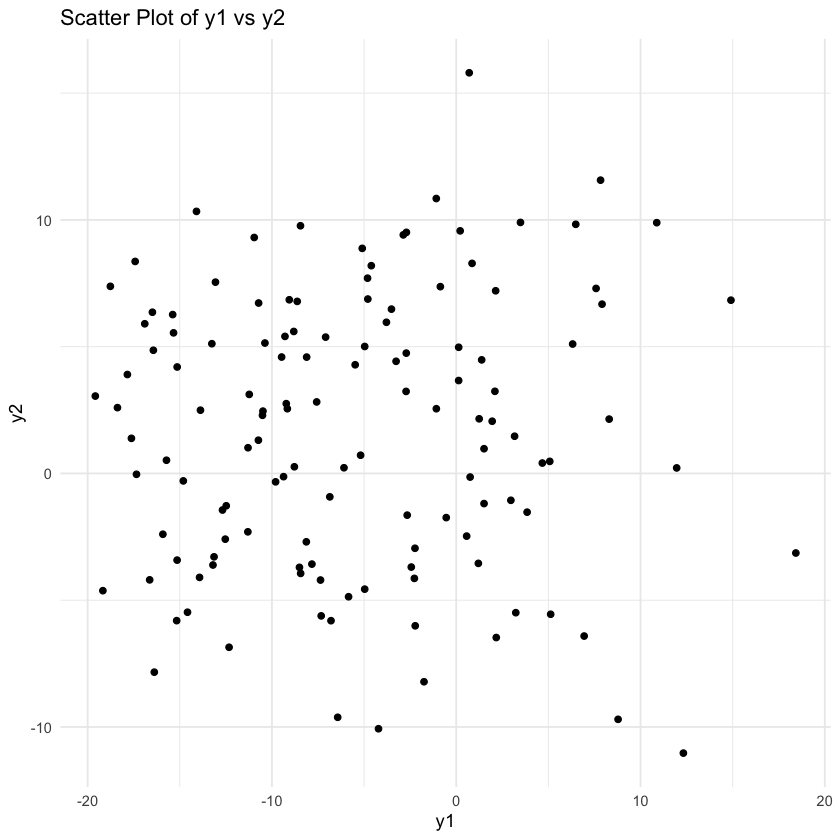

In [30]:
ggplot(df, aes(x = y1, y = y2)) +
  geom_point() + 
  theme_minimal() +
  ggtitle("Scatter Plot of y1 vs y2") +
  xlab("y1") +
  ylab("y2")

#### d. Xây dựng khoảng tin cậy 95% cho phương sai lambda1 của thành phần chính thứ nhất cho bởi ma trận hiện phương sai S


In [31]:
eigenvalues <- pca1$sdev^2
eigenvalues
n <- nrow(df) # số lượng mẫu
p <- ncol(df) # số lượng biến ban đầu
# Số lượng thành phần chính
m <- 1 # Số lượng thành phần chính đầu tiên
alpha <- 0.05
gamma <- 1 - alpha
z <- (1 - gamma) / (2 * m)
# Ước tính khoảng tin cậy cho từng giá trị riêng
ci_bounds <- sapply(eigenvalues[1:1], function(lambda) {
    lower <- lambda / (1 + qnorm(z, lower.tail = FALSE) * sqrt(2 / n))
    upper <- lambda / (1 - qnorm(z, lower.tail = FALSE) * sqrt(2 / n))
    c(lower = lower, upper = upper)
})
print(ci_bounds)


Comp.1    Comp.2    Comp.3    Comp.4    Comp.5 
68.223520 31.266617 22.923273 16.228380  2.374008

        Comp.1
lower 54.88160
upper 90.13588


In [32]:
eigenvalues <- pca1$sdev^2
n <- nrow(df) # số lượng mẫu
p <- ncol(df) # số lượng biến ban đầu
# Số lượng thành phần chính
m <- 1 # Số lượng thành phần chính đầu tiên

alpha <- 0.05
# Ước tính khoảng tin cậy cho từng giá trị riêng
ci_bounds <- sapply(eigenvalues[1:1], function(lambda) {
    lower <- lambda / (1 + qnorm(0.975) * sqrt(2 / m))
    upper <- lambda / (1 - qnorm(0.95) * sqrt(2 / m))
    c(lower = lower, upper = upper)
})
print(ci_bounds)


         Comp.1
lower  18.08775
upper -51.44386


# Bài 5.11 - Trang 125 (Tài liệu lưu hành nội bộ)


In [33]:
# Đường dẫn lưu trữ dữ liệu
path <- paste(base_path, "../data-PhamThiHoa/BT5-11.dat", sep = "/")
# Gán dữ liệu vào biến df
df <- read.table(path)
# Đặt tên lại cho cột
names(df) <- c("Family", "DistRd", "Cotton", "Maize", "Sorg", "Millet", "Bull", "Cattle", "Goats")
head(df)


,Family,DistRd,Cotton,Maize,Sorg,Millet,Bull,Cattle,Goats
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,12,80,1.5,1.0,3,0.25,2,0,1
2,54,8,6.0,4.0,0,1.00,6,32,5
3,11,13,0.5,1.0,0,0.00,0,0,0
4,21,13,2.0,2.5,1,0.00,1,0,5
5,61,30,3.0,5.0,0,0.00,4,21,0
6,20,70,0.0,2.0,3,0.00,2,0,3


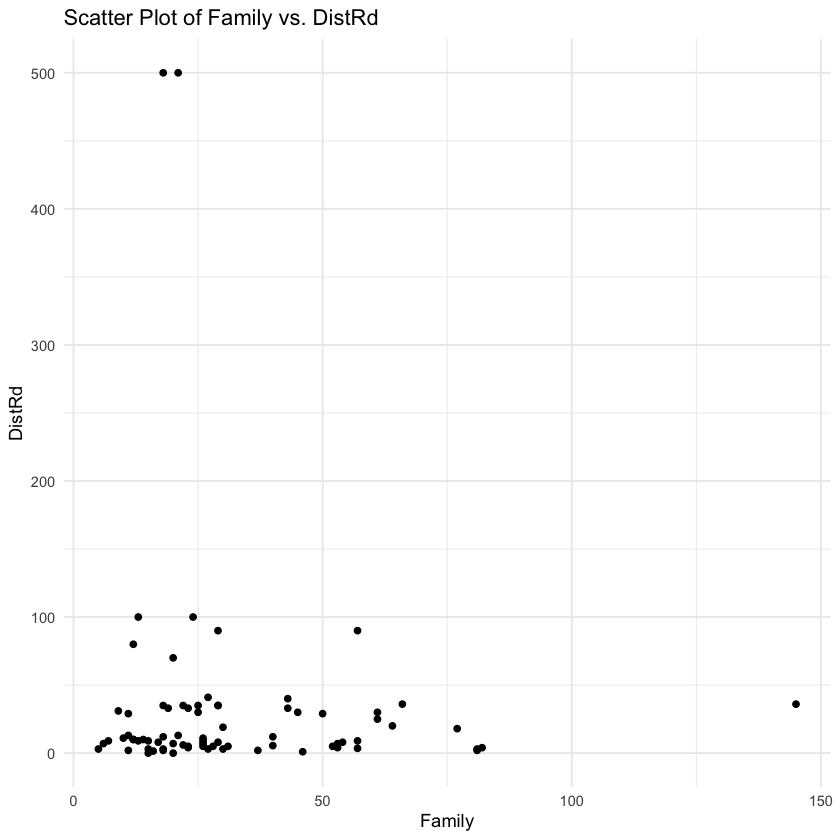

In [34]:
ggplot(data = df, aes(x = Family, y = DistRd)) +
     geom_point() + # Thêm các điểm phân tán
     labs(
          title = "Scatter Plot of Family vs. DistRd",
          x = "Family",
          y = "DistRd"
     ) + # Đặt tiêu đề và nhãn cho trục
     theme_minimal()


- Loại bỏ dữ liệu có DistRd > 450 và Family > 120


In [35]:
df[df$DistRd > 450, ]


,Family,DistRd,Cotton,Maize,Sorg,Millet,Bull,Cattle,Goats
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
69,18,500,2,1,1.5,0.5,1,0,0
72,21,500,5,1,3.0,4.0,1,0,5


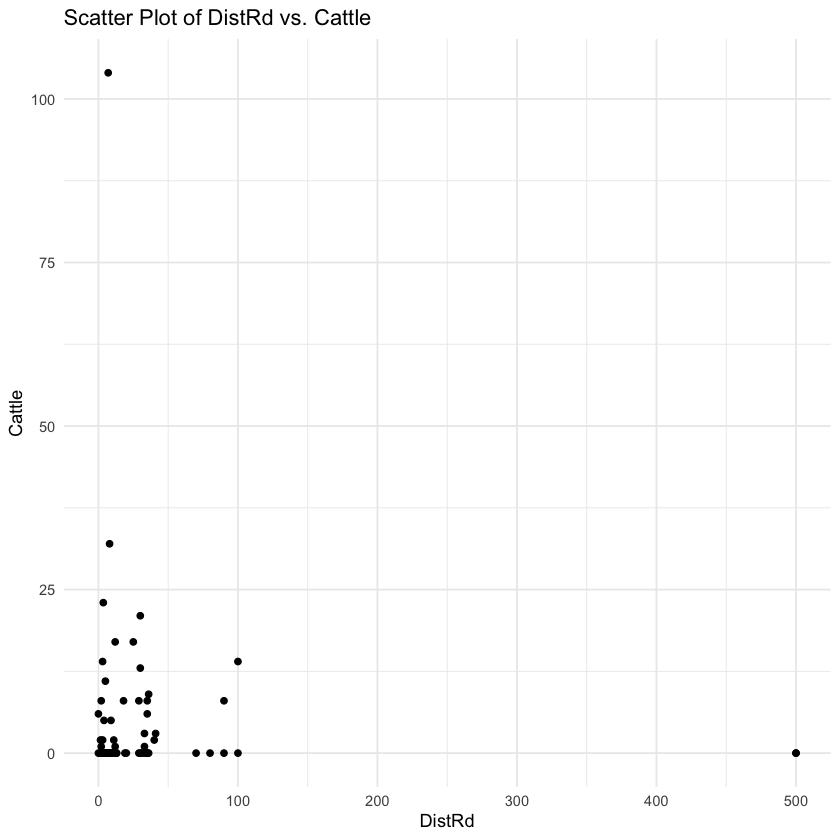

In [36]:
ggplot(data = df, aes(x = DistRd, y = Cattle)) +
     geom_point() + # Thêm các điểm phân tán
     labs(
          title = "Scatter Plot of DistRd vs. Cattle",
          x = "DistRd",
          y = "Cattle"
     ) + # Đặt tiêu đề và nhãn cho trục
     theme_minimal()


- Loại bỏ dữ liệu có DistRd > 450 và Cattle > 100


In [37]:
# Xem các giá trị ngoại lai:
df[df$DistRd > 450 | df$Family > 120 | df$Cattle > 100, ]


,Family,DistRd,Cotton,Maize,Sorg,Millet,Bull,Cattle,Goats
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
25,145,36,9.5,7,13.0,5.5,8,9,15
34,53,7,0.0,1,11.0,2.0,8,104,10
69,18,500,2.0,1,1.5,0.5,1,0,0
72,21,500,5.0,1,3.0,4.0,1,0,5


In [38]:
# Loại bỏ ngoại lai:
df <- df[!(df$DistRd > 450 | df$Family > 120 | df$Cattle > 100), ]


#### b. Phân tích thành phần chính theo ma trận tương quan R. Xác định số các thành phần có thể biểu diễn tốt sự thay đổi của dữ liệu. Dùng các tr số đóng góp vào phương sai suy rộng cũng như scree plot để minh hoạ


In [39]:
pca <- princomp(df, cor = TRUE)
summary(pca, loadings = TRUE)


Importance of components:
                          Comp.1    Comp.2   Comp.3     Comp.4    Comp.5
Standard deviation     2.0457593 1.1992026 1.041393 0.88984136 0.7773833
Proportion of Variance 0.4650146 0.1597874 0.120500 0.08797974 0.0671472
Cumulative Proportion  0.4650146 0.6248020 0.745302 0.83328173 0.9004289
                           Comp.6     Comp.7     Comp.8     Comp.9
Standard deviation     0.60509161 0.48992202 0.41451805 0.34373679
Proportion of Variance 0.04068176 0.02666929 0.01909169 0.01312833
Cumulative Proportion  0.94111069 0.96777998 0.98687167 1.00000000

Loadings:
       Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
Family  0.434                0.171                0.797  0.263  0.249
DistRd        -0.497 -0.569  0.496 -0.378 -0.187                     
Cotton  0.446         0.132        -0.219  0.200 -0.361 -0.329  0.675
Maize   0.352 -0.353  0.388  0.240         0.273        -0.363 -0.574
Sorg    0.204  0.604 -0.111        -0.645 -0.246     

- Từ kết quả PCA ta có: Proportion of Variance
  - CP1: Giải thích 46.5% biến động tổng thể, là thành phần quan trọng nhất.
  - CP2: Giải thích thêm 16.0%, nâng tổng biến động được giải thích lên 62.5%.
  - CP3: Giải thích thêm 12.1%, tổng cộng là 74.5%.
  - CP4: Giải thích thêm 8.797974%, tổng cộng là 83.328173%.
  - CP5: Giải thích thêm 6.71472%, tổng cộng là 90.04289%.
  - Các thành phần tiếp theo: Mỗi thành phần tiếp theo giải thích một lượng nhỏ hơn biến động tổng thể, và tới CP9, 100% biến động đã được giải thích.
- Như vậy, Sử dụng tỷ lệ phương sai toàn phần, chúng ta có thể thấy được rằng 4 thành phần chính đầu tiên giải thích được 83.33% phương sai. Vậy ta quyết định giữ lại 4 thành phần chính đầu tiên.


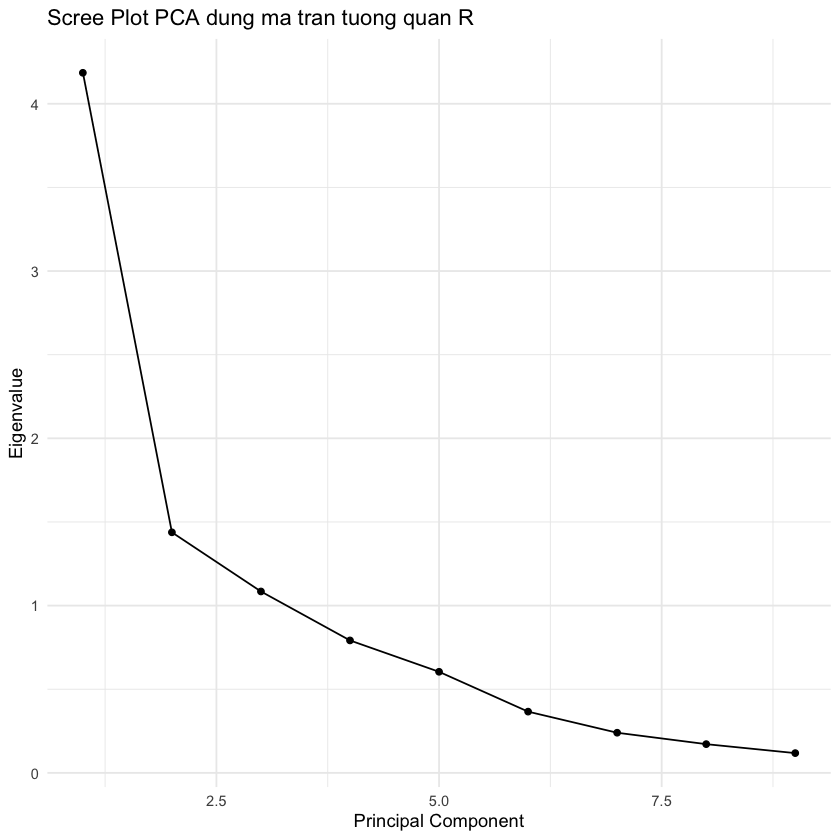

In [40]:
eigen <- pca$sdev^2
# Tạo dataframe cho biểu đồ
scree <- data.frame(
  Component = seq_along(eigen),
  Eigenvalue = eigen
)
# Vẽ biểu đồ
ggplot(scree, aes(x = Component, y = Eigenvalue)) +
  geom_line() +
  geom_point() +
  labs(
    title = "Scree Plot PCA dung ma tran tuong quan R",
    x = "Principal Component",
    y = "Eigenvalue"
  ) +
  theme_minimal()


Qua Scree-plot dùng ma trận tương quan R ta thấy rằng: Sự thay đổi rõ ràng nhất về độ dốc ở thành phần chính thứ 5, PC5, đó là khuỷ tay của đồ thị Scree-plot. Do đó, ta có thể giữ lại 4 thành phần chính đầu tiên (PC1, PC2, PC3)


#### c. Phân tích 5 thành phần chính đầu tiên. Có thể xác định thành phần "kích cỡ nông trại", thành phần "số dê nuôi" và "Khoảng các tới đường gần nhất" không?


- Các biến cần xem xét:
  - kích cỡ nông trại: "Cotton","Maize", "Sorg", "Millet"
  - số dê nuôi: "Goats"
  - Khoảng các tới đường gần nhất không: "DistRd"


In [41]:
pca$loadings



Loadings:
       Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
Family  0.434                0.171                0.797  0.263  0.249
DistRd        -0.497 -0.569  0.496 -0.378 -0.187                     
Cotton  0.446         0.132        -0.219  0.200 -0.361 -0.329  0.675
Maize   0.352 -0.353  0.388  0.240         0.273        -0.363 -0.574
Sorg    0.204  0.604 -0.111        -0.645 -0.246        -0.126 -0.293
Millet  0.240  0.415 -0.116  0.616  0.527 -0.181 -0.241              
Bull    0.445               -0.146         0.134 -0.396  0.751 -0.190
Cattle  0.355 -0.284        -0.373  0.218 -0.759        -0.169       
Goats   0.255        -0.687 -0.351  0.249  0.402  0.131 -0.274 -0.149

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
SS loadings     1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000
Proportion Var  0.111  0.111  0.111  0.111  0.111  0.111  0.111  0.111  0.111
Cumulative Var  0.111  0.222  0.333  0.444  0.556  0.6

Từ phần loadings của PCA ta thấy:

- Cotton
  - CP1: 0.446
  - CP3: 0.132
- Maize
  - CP1: 0.352
  - CP2: -0.353
  - CP3: 0.388
  - CP4: 0.240
- Sorg
  - CP2: 0.604
  - CP4: -0.645
- Millet
  - CP4: 0.616
  - CP5: 0.527
- Goats
  - CP3: -0.687
  - CP4: -0.351
  - CP5: 0.249
- DistRd

  - CP2: -0.497
  - CP3: -0.569
  - CP4: 0.496
  - CP5: -0.378

- Cotton: Có mặt mạnh mẽ ở CP1 và những ảnh hưởng nhỏ ở các thành phần khác, cho thấy CP1 có thể phản ánh thông tin quan trọng về Cotton, nhưng các thành phần sau cần được xem xét để hiểu đầy đủ biến này.
- Maize và Sorg: Cả hai biến này đều có mặt đáng kể trong các thành phần đầu tiên, đặc biệt là Maize trong các thành phần từ 1 đến 4 và Sorg chủ yếu ở CP2 và CP4, cho thấy năm thành phần đầu tiên khá hiệu quả trong việc phản ánh các biến này.
- Millet: Rất mạnh mẽ ở CP4 và CP5, chỉ ra rằng để hiểu Millet, ít nhất phải xem xét đến CP5.
- Goats: Mạnh nhất ở CP3 và có sự xuất hiện ở CP4 và CP5, chứng tỏ CP3 là rất quan trọng để nắm bắt thông tin về Goats.
- DistRd: Biến này có ảnh hưởng đáng kể trải đều từ CP2 đến CP5, cho thấy nó là một biến phức tạp và cần nhiều thành phần để hiểu hết ảnh hưởng của nó.

- Kết luận: Dựa trên phân tích trên, năm thành phần chính đầu tiên có thể cung cấp thông tin quan trọng và có ý nghĩa về các biến Cotton, Maize, Sorg, Millet, Goats, và DistRd.


### Bài 6.30 trang 351 (sách Jonhson)

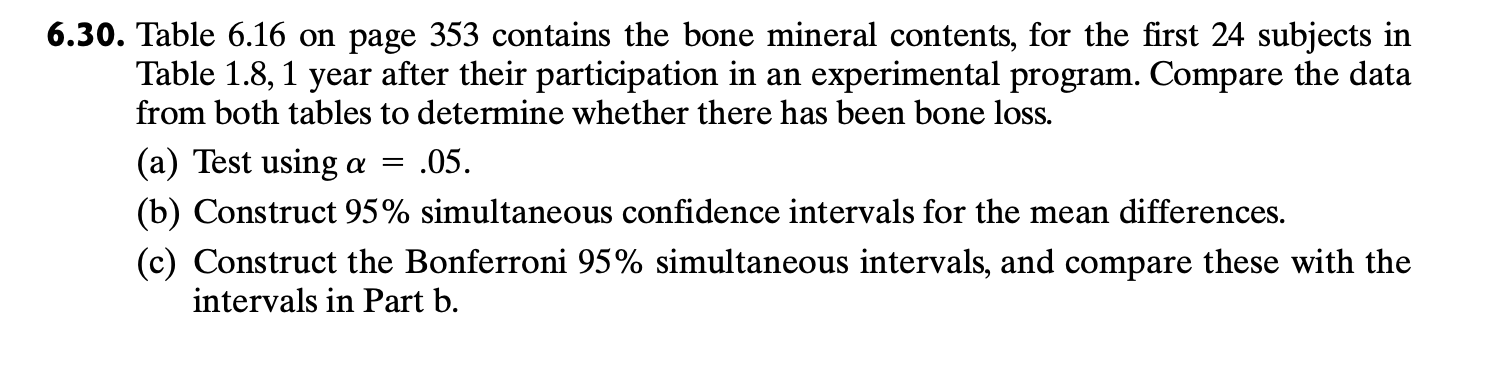


In [42]:
# Đường dẫn lưu trữ dữ liệu
path_6_16 <- paste(base_path, "../data-PhamThiHoa/T6-16.DAT", sep = "/")
path_1_8 <- paste(base_path, "../data-PhamThiHoa/T1-8.DAT", sep = "/")
# Gán dữ liệu vào biến df
df_1_8 <- read.table(path_1_8)
df_6_16 <- read.table(path_6_16)
# # # Xem 6 dòng đầu tiên của dữ liệu
head(df_1_8)
head(df_6_16)


,V1,V2,V3,V4,V5,V6
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.103,1.052,2.139,2.238,0.873,0.872
2,0.842,0.859,1.873,1.741,0.590,0.744
3,0.925,0.873,1.887,1.809,0.767,0.713
4,0.857,0.744,1.739,1.547,0.706,0.674
5,0.795,0.809,1.734,1.715,0.549,0.654
6,0.787,0.779,1.509,1.474,0.782,0.571


,V1,V2,V3,V4,V5,V6
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.027,1.051,2.268,2.246,0.869,0.964
2,0.857,0.817,1.718,1.710,0.602,0.689
3,0.875,0.880,1.953,1.756,0.765,0.738
4,0.873,0.698,1.668,1.443,0.761,0.698
5,0.811,0.813,1.643,1.661,0.551,0.619
6,0.640,0.734,1.396,1.378,0.753,0.515


In [43]:
xbar_1_18 = colMeans(df_1_8)
xbar_6_16= colMeans(df_6_16)
xbar_1_18
xbar_6_16

V1      V2      V3      V4      V5      V6 
0.84380 0.81832 1.79268 1.73484 0.70440 0.69384

V1        V2        V3        V4        V5        V6 
0.8409583 0.8101667 1.7780833 1.7169167 0.7126667 0.6867500

In [44]:
mS_1_18 = cov(df_1_8)
mS_6_16= cov(df_6_16)
mS_1_18
mS_6_16

,V1,V2,V3,V4,V5,V6
V1,0.013001583,0.010378442,0.02234997,0.02008568,0.009120708,0.007957842
V2,0.010378442,0.011417893,0.01853519,0.02109951,0.008529783,0.008908512
V3,0.022349975,0.018535190,0.08035723,0.06677620,0.016836925,0.012847030
V4,0.020085675,0.021099512,0.06677620,0.06948447,0.017735483,0.016793598
V5,0.009120708,0.008529783,0.01683692,0.01773548,0.011568417,0.008071150
V6,0.007957842,0.008908512,0.01284703,0.01679360,0.008071150,0.010599140


,V1,V2,V3,V4,V5,V6
V1,0.015515259,0.011161442,0.02949613,0.02415421,0.008976072,0.009284293
V2,0.011161442,0.011757536,0.02348533,0.02357567,0.008681145,0.009687304
V3,0.029496134,0.023485333,0.10505521,0.08406183,0.023961333,0.018327022
V4,0.024154214,0.023575667,0.08406183,0.08434330,0.021215841,0.019657326
V5,0.008976072,0.008681145,0.02396133,0.02121584,0.011507536,0.007543174
V6,0.009284293,0.009687304,0.01832702,0.01965733,0.007543174,0.012546196


In [45]:
solve(mS_1_18)
solve(mS_6_16)

,V1,V2,V3,V4,V5,V6
V1,500.78034,-400.887376,-142.443315,143.66134,-99.368414,-18.34306
V2,-400.88738,704.256834,118.257868,-173.28671,3.785007,-162.59680
V3,-142.44331,118.257868,112.337412,-116.31594,2.312697,53.92275
V4,143.66134,-173.286713,-116.315942,154.11518,-14.592702,-54.30267
V5,-99.36841,3.785007,2.312697,-14.59270,249.603502,-98.32829
V6,-18.34306,-162.596800,53.922747,-54.30267,-98.328288,340.33697


,V1,V2,V3,V4,V5,V6
V1,293.98492,-236.38956,-78.67764,63.04965,14.81843,-27.79354
V2,-236.38956,574.76559,66.98346,-96.93800,-114.11868,-146.21703
V3,-78.67764,66.98346,73.40843,-65.82915,-36.68837,24.46887
V4,63.04965,-96.93800,-65.82915,88.52034,11.91735,-21.50604
V5,14.81843,-114.11868,-36.68837,11.91735,235.01061,-29.22613
V6,-27.79354,-146.21703,24.46887,-21.50604,-29.22613,228.69559


#### a. Kiểm định với α = 0.05.

In [46]:
n = 24
p = 6
alpha = 0.05

In [47]:
tsq = n*t(xbar_6_16-xbar_1_18) %*% solve(mS_6_16) %*% (xbar_6_16-xbar_1_18)
tsq

1.424031


In [48]:
# Giá trị thống kê:
ctsq = ((n-p) / (p*(n-1))) * tsq
c2 = qf(0.95, p, n-p)
c(ctsq,c2)

[1] 0.1857431 2.6613045

- Với mức ý nghĩa 5% ta thấy giá trị thống kê = 0.185743109076548 <  2.6613045229279
- Vậy ta chấp nhận giả thuyết H0 rằng trung bình của 2 bảng 1_18 và 6_16 là bằng nhau

#### b. Xây dựng khoảng tin cậy đồng thời 95% cho sự khác biệt trung bình


In [49]:
#eigenvalue and eigenvector pairs for S
eig=eigen(mS_6_16)
eig$values
eig$vectors

[1] 0.205439297 0.015900142 0.010657748 0.004218113 0.003239077 0.001270658

-0.2133996,0.36030426,0.464309658,0.45786505,-0.4542088,-0.4394450
-0.1874134,0.46607276,0.056966669,0.07243620,-0.2160792,0.8321478
-0.6944545,-0.47164555,0.453649188,-0.01392386,0.2609098,0.1456640
-0.6175021,0.03537959,-0.737678875,0.07400613,-0.1999645,-0.1667533
-0.1776739,0.27591732,0.176595048,-0.88087820,-0.2232683,-0.1879380
-0.1555408,0.59424356,-0.004221501,0.05912197,0.7675257,-0.1734150


In [50]:
#Tìm F(p, n-p) với alpha = 0.05
f = qf(0.95,p,n-p)
# Tìm c:
c = sqrt(
    (p*(n-1)*f)/(n-p)
    )
c

[1] 4.517005

In [51]:
# Chọn a
a = diag(6)
a

1,0,0,0,0,0
0,1,0,0,0,0
0,0,1,0,0,0
0,0,0,1,0,0
0,0,0,0,1,0
0,0,0,0,0,1


In [52]:
# Tìm Khoảng tin cậy đồng thời T2 
# Áp dụng công thức số 12 ta được:
T2_ktc = c()
for (i in 1:6)
{
value = c(
    t(a[i,])%*%xbar_6_16 - c*sqrt(t(a[i,])%*%mS_6_16%*%a[i,]/n),
    t(a[i,])%*%xbar_6_16 + c*sqrt(t(a[i,])%*%mS_6_16%*%a[i,]/n)
    )
#  Tên 
names(value)= c(names(df_6_16)[i], names(df_6_16)[i])
T2_ktc = append(T2_ktc,value)
}
print("Vay khoang tin cay dong thoi T2 la:")
T2_ktc

[1] "Vay khoang tin cay dong thoi T2 la:"


V1        V1        V2        V2        V3        V3        V4        V4 
0.7261101 0.9558066 0.7101890 0.9101444 1.4792330 2.0769337 1.4491415 1.9846918 
       V5        V5        V6        V6 
0.6137576 0.8115757 0.5834736 0.7900264

#### c. Tìm các khoảng tin cậy đồng thời Bonferroni 95%

In [53]:
t = qt(1-(1-0.95)/(2*p),n-1)
t

[1] 2.886264

In [54]:
bf_ktc = c()
for(i in 1:6)
{
value = c(
    xbar_6_16[i] - t*sqrt(mS_6_16[i,i]/n),
    xbar_6_16[i] + t*sqrt(mS_6_16[i,i]/n)
    )
names(value)= c(names(df_6_16)[i], names(df_6_16)[i])
bf_ktc = append(bf_ktc,value)
}
bf_ktc

V1        V1        V2        V2        V3        V3        V4        V4 
0.7675729 0.9143438 0.7462832 0.8740501 1.5871247 1.9690419 1.5458144 1.8880189 
       V5        V5        V6        V6 
0.6494660 0.7758673 0.6207587 0.7527413

####  Nhận xét:
- Với cùng độ tin cậy 95% ta thấy khoảng tin cậy đồng thời T2 có chứa khoảng tin cậy đồng thời Bonferroni nghĩa là khoảng tin cậy đồng thời ở câu c (Bonferroni) tốt hơn khoảng tin cậy đồng thời T2 ở câu b

# Bài 9.34 - Trang 537 (Sách Jonhson)


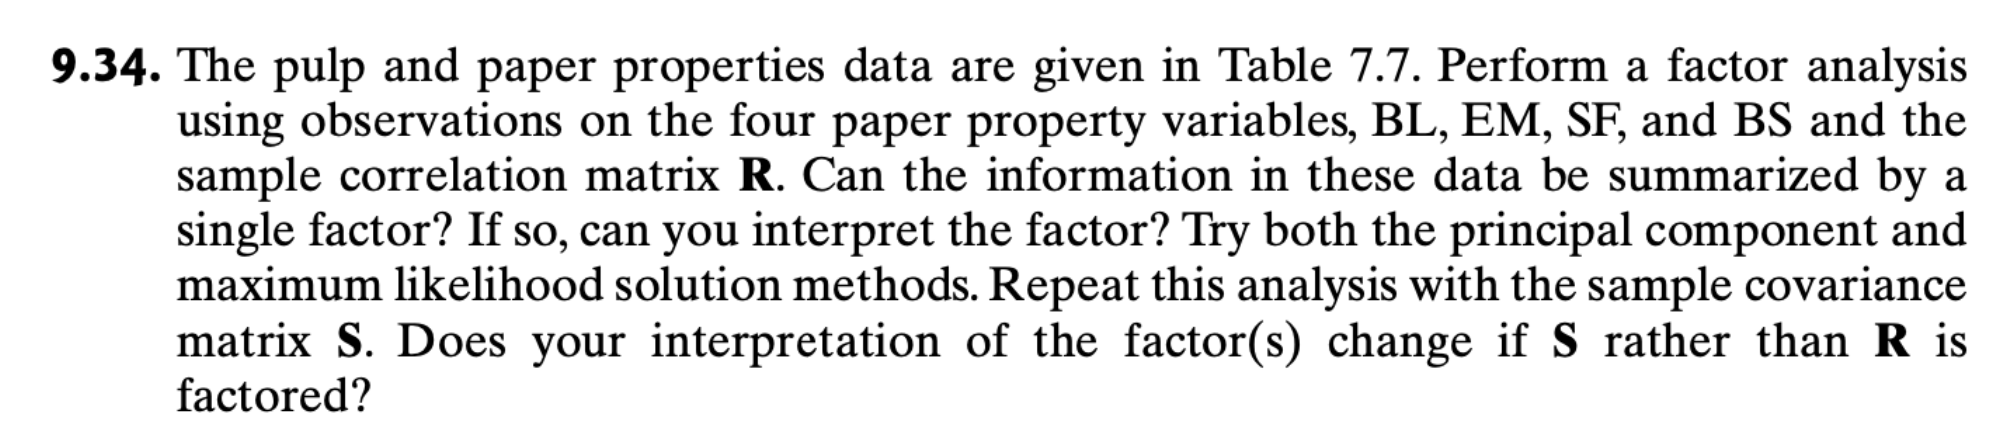


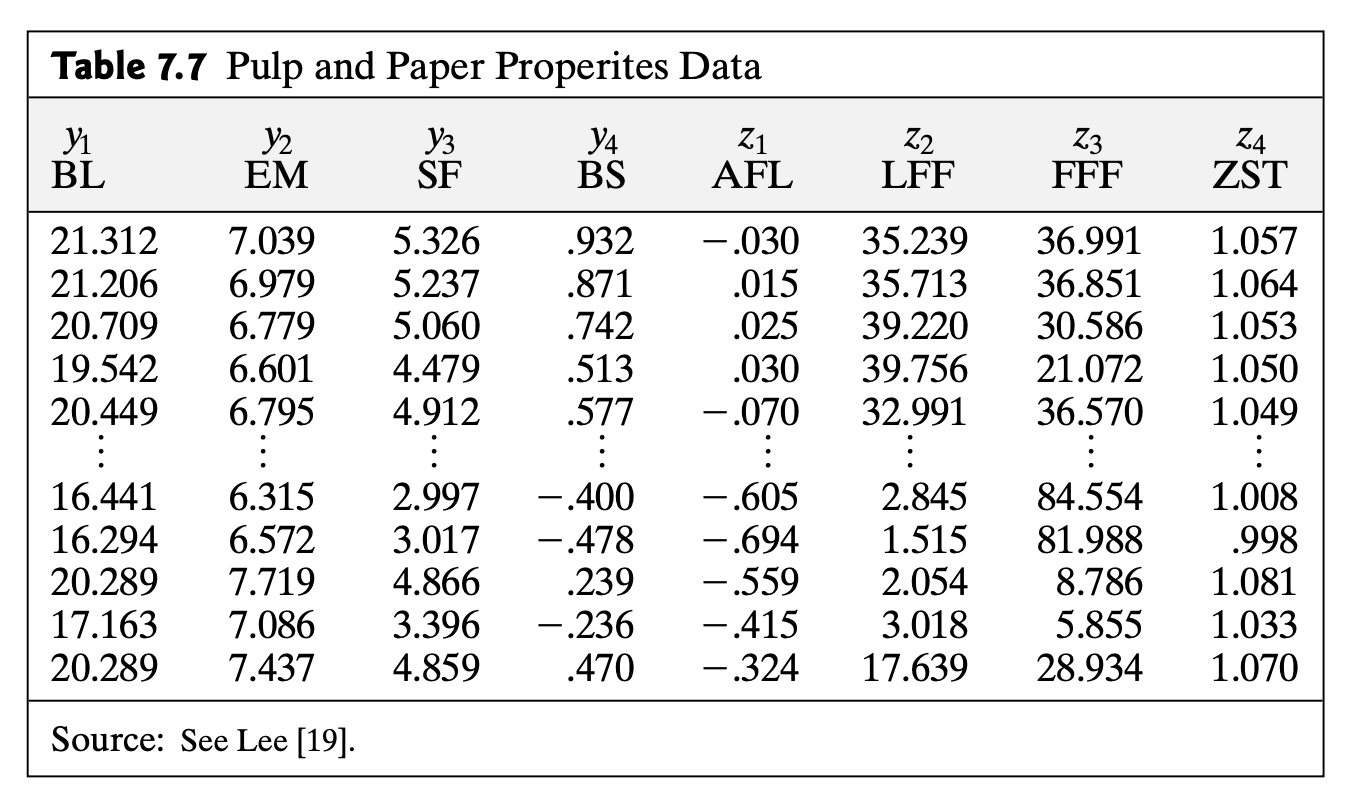


In [55]:
# Đường dẫn lưu trữ dữ liệu
path <- paste(base_path, "../data-PhamThiHoa/T7-7.dat", sep = "/")
# Gán dữ liệu vào biến df
df <- read.table(path)
# Chỉ khảo sát 4 biến: BL, EM, SF, và BF. Tương ứng với V1,2,3,4
df <- df[, c("V1", "V2", "V3", "V4")]
# Đặt tên lại cho cột
names(df) <- c("BL", "EM", "DF", "BF")
head(df)


,BL,EM,DF,BF
,<dbl>,<dbl>,<dbl>,<dbl>
1,21.312,7.039,5.326,0.932
2,21.206,6.979,5.237,0.871
3,20.709,6.779,5.060,0.742
4,19.542,6.601,4.479,0.513
5,20.449,6.795,4.912,0.577
6,20.841,6.919,5.108,0.784


In [56]:
# Ma trận tương quan R
R <- cor(df)
R


,BL,EM,DF,BF
BL,1.0000000,0.9138256,0.9838790,0.9875554
EM,0.9138256,1.0000000,0.9422199,0.8746665
DF,0.9838790,0.9422199,1.0000000,0.9745114
BF,0.9875554,0.8746665,0.9745114,1.0000000


- Nhận xét ma trận tương quan R: Tất cả các biến "BL","EM","DF","BF" đều có mối tương quan thuận mạnh với nhau (> 0.9)


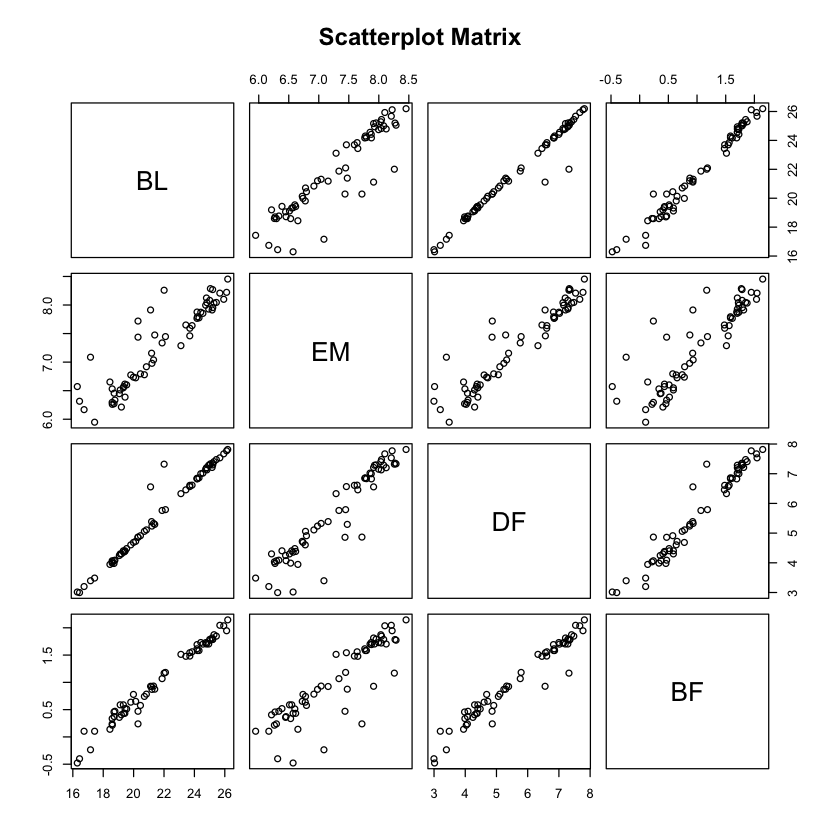

In [57]:
# Vẽ biểu đồ Scatterplot cho toàn bộ các cột dữ liệu
# options(repr.plot.width=20, repr.plot.height=7)
pairs(df, main = "Scatterplot Matrix")


##### Phương pháp thành phần chính


In [58]:
# eigenvalues của R
eigenvalues <- eigen(R)
eigenvalues


eigen() decomposition
$values
[1] 3.839505765 0.140304022 0.012603928 0.007586285

$vectors
           [,1]        [,2]        [,3]       [,4]
[1,] -0.5061685 -0.26110200  0.56517738  0.5968196
[2,] -0.4854922  0.81904792  0.19350510 -0.2366720
[3,] -0.5080684 -0.02020866 -0.80019598  0.3180323
[4,] -0.4999573 -0.51046828  0.05307262 -0.6976017


In [59]:
lambdas <- eigenvalues$values
lambdas


[1] 3.839505765 0.140304022 0.012603928 0.007586285

- Từ bảng phân tích giá trị riêng ta thấy rằng, Trong bộ dữ liệu này chỉ có 1 trị riêng đầu tiên = 3.83950576532311 > 1 là có ý nghĩa, các trị riêng còn lại đều < 1. Vậy ta có thể quyết định số nhân tố cần giữ lại = 1.


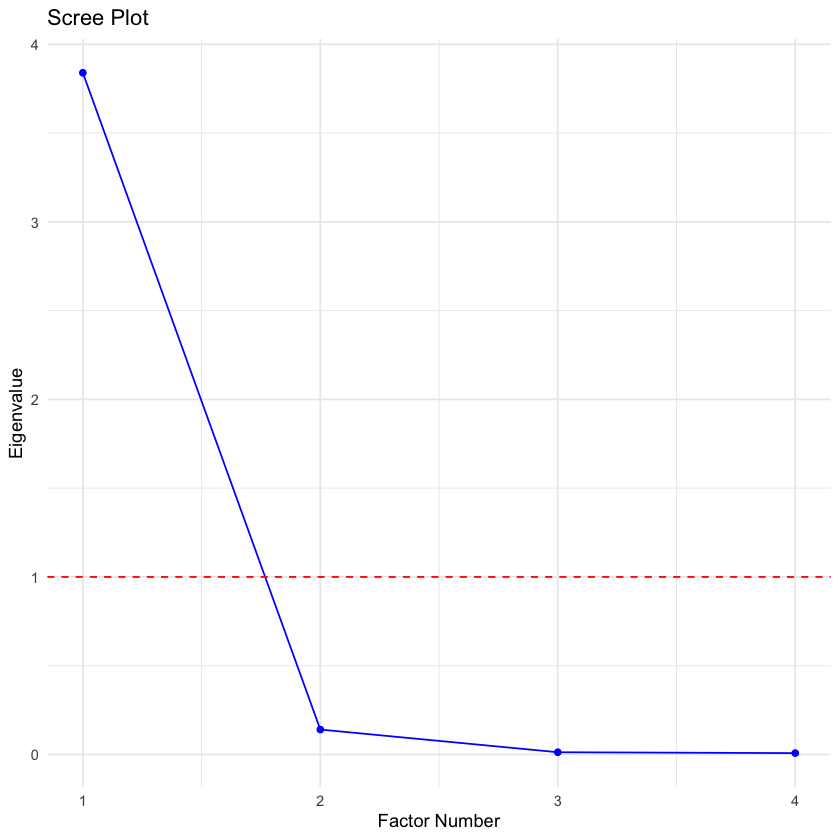

In [60]:
# Vẽ Scree plot để minh hoạ
# Tạo dataframe cho ggplot
eigen_df <- data.frame(Factor = 1:length(lambdas), Eigenvalue = lambdas)

# Vẽ biểu đồ Scree
ggplot(eigen_df, aes(x = Factor, y = Eigenvalue)) +
  geom_line(color = "blue") + # Vẽ đường nối các điểm
  geom_point(color = "blue") + # Vẽ các điểm
  geom_hline(yintercept = 1, linetype = "dashed", color = "red") + # Đường ngang tại giá trị riêng = 1
  labs(title = "Scree Plot", x = "Factor Number", y = "Eigenvalue") + # Tiêu đề và nhãn trục
  theme_minimal() # Chủ đề đồ họa


In [61]:
# Tỷ lệ tích luỹ (cumulative proportion):
cumsum(lambdas) / sum(lambdas)


[1] 0.9598764 0.9949524 0.9981034 1.0000000

In [62]:
# Factor loadings:
L <- cbind(
    sqrt(lambdas[1]) * eigenvalues$vectors[, 1]
    # sqrt(lambdas[2]) * eigenvalues$vectors[, 2]
)
L


-0.9918199
-0.9513052
-0.9955425
-0.9796492


##### Từ kết quả của L ta thấy rằng:

- Hàng 1: -0.9918199 Giá trị tải trọng này là rất cao và âm, cho thấy biến thứ nhất có mối quan hệ ngược chiều rất mạnh với nhân tố. Nghĩa là, khi giá trị của nhân tố tăng lên thì giá trị của biến này sẽ giảm xuống một cách đáng kể.
- Hàng 2: -0.9513052 Tương tự như hàng đầu tiên, giá trị tải trọng cao và âm cho biến thứ hai cũng chỉ ra rằng nó có mối quan hệ ngược chiều mạnh với nhân tố.
- Hàng 3: -0.9955425 Đây là giá trị tải trọng cao nhất trong bốn hàng, cũng âm, thể hiện mối quan hệ ngược chiều cực kỳ mạnh mẽ giữa biến thứ ba và nhân tố. Điều này cho thấy biến này phản ứng một cách rõ rệt theo chiều ngược lại với nhân tố.
- Hàng 4: -0.9796492
  Giá trị tải trọng này tương đối cao và âm, cho thấy biến thứ tư cũng có mối quan hệ ngược chiều mạnh với nhân tố.

##### Nhận Xét Chung

Các giá trị tải trọng đều rất cao và đều âm, điều này cho thấy tất cả các biến đều có mối quan hệ ngược chiều mạnh mẽ với nhân tố duy nhất trong mô hình. Mức độ tải trọng cao cho thấy nhân tố này có khả năng giải thích phần lớn biến động trong tất cả bốn biến. Do đó, nhân tố này có thể được xem là một yếu tố chủ chốt trong việc giải thích sự biến động của dữ liệu.

#### Kết Luận

Phân tích nhân tố đã cho thấy một nhân tố duy nhất có thể giải thích đáng kể sự biến động trong các biến quan sát được. Các giá trị tải trọng cao và âm thể hiện mối quan hệ ngược chiều mạnh giữa nhân tố này và các biến, cho thấy khi nhân tố này tăng, các biến sẽ giảm và ngược lại.


In [63]:
# Communality
h2 <- diag(L %*% t(L))
h2


[1] 0.9837067 0.9049816 0.9911049 0.9597125

In [64]:
# Specific variances
Psi <- diag(R) - h2
Psi


BL          EM          DF          BF 
0.016293324 0.095018358 0.008895077 0.040287476

In [65]:
# Verify R = LL' + Psi
L %*% t(L) + diag(Psi)


1.0000000,0.9435234,0.9873989,0.9716355
0.9435234,1.0000000,0.9470648,0.9319454
0.9873989,0.9470648,1.0000000,0.9752824
0.9716355,0.9319454,0.9752824,1.0000000


In [66]:
R - (L %*% t(L) + diag(Psi))


,BL,EM,DF,BF
BL,0.000000000,-0.029697865,-0.003519906,0.015919890
EM,-0.029697865,0.000000000,-0.004844924,-0.057278871
DF,-0.003519906,-0.004844924,0.000000000,-0.000771003
BF,0.015919890,-0.057278871,-0.000771003,0.000000000


In [67]:
norm(R - L %*% t(L) + diag(Psi))


[1] 0.2818584

#### Phương pháp hợp lý cực đại


In [68]:
ftmodel <- factanal(df, factors = 1, rotation = "none")
ftmodel



Call:
factanal(x = df, factors = 1, rotation = "none")

Uniquenesses:
   BL    EM    DF    BF 
0.005 0.160 0.026 0.022 

Loadings:
   Factor1
BL 0.998  
EM 0.916  
DF 0.987  
BF 0.989  

               Factor1
SS loadings      3.787
Proportion Var   0.947

Test of the hypothesis that 1 factor is sufficient.
The chi square statistic is 53.43 on 2 degrees of freedom.
The p-value is 2.49e-12 

##### Từ kết quả của phân tích nhân tố sử dụng phương pháp hợp lý cực đại ta thấy:

- Tính độc đáo (Uniquenesses): Các giá trị này cho biết tỷ lệ phần trăm của biến thể của mỗi biến không được giải thích bởi nhân tố chung. Các giá trị Uniquenesses rất thấp cho BL, DF, và BF (0.005, 0.026, và 0.022 tương ứng) nghĩa là hầu hết biến thể của các biến này đều được giải thích bởi nhân tố chung. EM có độc đáo cao hơn một chút (0.160), nhưng vẫn phần lớn được nhân tố chung giải thích.
- Tải nhân tố (Loadings): Các giá trị tải cho thấy mức độ mỗi biến được liên kết chặt chẽ với nhân tố. Các giá trị tải rất cao cho tất cả bốn biến (đặc biệt là BL, DF, và BF với giá trị gần 1), cho thấy rằng nhân tố này có mối liên hệ mạnh mẽ với mỗi biến, điều này phản ánh sự đồng biến cao giữa chúng.
- Tổng số vuông tải (SS loadings) và Tỷ lệ Biến thể (Proportion Var): Tổng số vuông tải (SS loadings) là 3.787, và chiếm tỷ lệ biến thể là 94.7%. Điều này cho thấy rằng nhân tố đơn lẻ này giải thích một phần rất lớn tỷ lệ biến thể trong dữ liệu.
- Kiểm định giả thuyết chỉ có một nhân tố là đủ (Test of the hypothesis that 1 factor is sufficient): Giá trị thống kê Chi-square là 53.43 với 2 bậc tự do, và p-value rất nhỏ (2.49e-12), cho thấy rằng mô hình một nhân tố không đủ để giải thích hoàn hảo tất cả các biến thể trong dữ liệu. Điều này có nghĩa là, mặc dù nhân tố đơn lẻ giải thích được một tỷ lệ lớn biến thể, vẫn có một phần biến thể mà nhân tố này không bao gồm.

##### Kết Luận:

- Kết quả cho thấy có một nhân tố chung mạnh mẽ giải thích phần lớn biến thể trong dữ liệu của các biến.


#### Lặp lại phân tích với ma trận hiệp phương sai mẫu S:


In [69]:
S <- cov(df)
S


,BL,EM,DF,BF
BL,8.302871,1.8866363,4.1473181,1.9720562
EM,1.886636,0.5133593,0.9875851,0.4343071
DF,4.147318,0.9875851,2.1400458,0.9879663
BF,1.972056,0.4343071,0.9879663,0.4802721


In [70]:
# eigenvalues của S
eigenvalues <- eigen(S)
# eigenvalues
lambdas <- eigenvalues$values
# lambdas
# Tỷ lệ tích luỹ (cumulative proportion):
cumsum(lambdas) / sum(lambdas)
# Factor loading:
L <- cbind(
    sqrt(lambdas[1]) * eigenvalues$vectors[, 1]
    # sqrt(lambdas[2]) * eigenvalues$vectors[, 2]
    # sqrt(lambdas[3]) * eigenvalues$vectors[, 3],
    # sqrt(lambdas[4]) * eigenvalues$vectors[, 4]
)
L


[1] 0.9876239 0.9966844 0.9994710 1.0000000

2.8784542
0.6640048
1.4494165
0.6839584


##### Từ kết quả bảng L ta thấy rằng

- Hàng 1: 2.8784542 Giá trị tải trọng rất cao này cho biết biến thứ nhất có mối quan hệ mạnh mẽ với nhân tố. Nó cho thấy biến thứ nhất được giải thích một cách rất đáng kể bởi nhân tố này, có nghĩa là khi nhân tố này tăng lên, giá trị của biến này cũng tăng theo.
- Hàng 2: 0.6640048 Giá trị tải trọng này cho biến thứ hai thấp hơn nhiều so với biến thứ nhất, nhưng vẫn có mức độ tương quan tích cực với nhân tố. Điều này cho thấy biến thứ hai cũng được nhân tố này giải thích, nhưng mức độ ảnh hưởng không mạnh bằng biến thứ nhất.
- Hàng 3: 1.4494165 Giá trị tải trọng cao này cho biến thứ ba chỉ ra rằng nhân tố này cũng giải thích một phần đáng kể sự biến động của biến thứ ba. Biến này có mối quan hệ tích cực khá mạnh với nhân tố.
- Hàng 4: 0.6839584 Giá trị tải trọng này cho biến thứ tư tương tự như biến thứ hai, cho thấy mối quan hệ tích cực với nhân tố, mặc dù không mạnh mẽ như biến thứ nhất hay thứ ba.

##### Nhận Xét Chung

Tất cả các giá trị tải trọng đều dương, điều này cho thấy tất cả các biến đều có mối quan hệ tích cực với nhân tố duy nhất này. Các biến đều được nhân tố này giải thích, mặc dù mức độ giải thích có khác nhau: biến thứ nhất và thứ ba được giải thích nhiều hơn so với hai biến còn lại.

##### Kết Luận

Ma trận tải trọng này cho thấy một nhân tố duy nhất có khả năng giải thích đáng kể sự biến động của các biến trong mô hình. Sự khác biệt trong mức độ tải trọng cho thấy sự không đồng đều trong mức độ mà các biến được giải thích bởi nhân tố này. Biến thứ nhất và thứ ba đặc biệt có mối quan hệ mạnh mẽ với nhân tố, trong khi biến thứ hai và thứ tư, mặc dù có mối quan hệ tích cực, nhưng ảnh hưởng không mạnh bằng.


# Bài 9.35 - Trang 537 (Sách Jonhson)

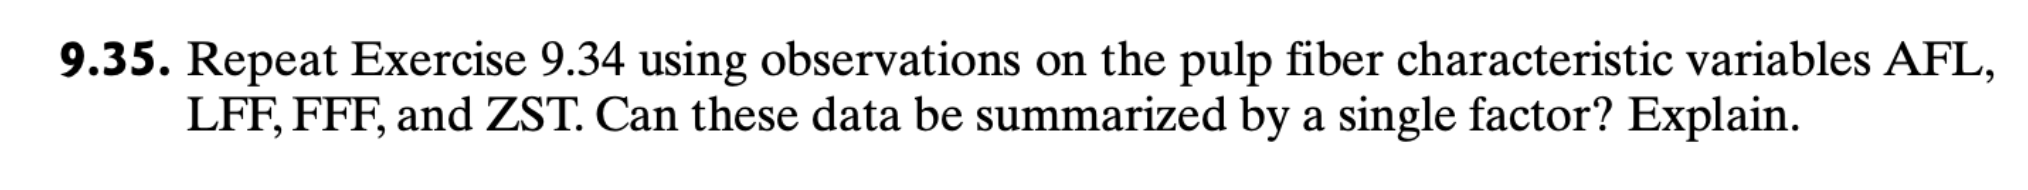


In [71]:
# Đường dẫn lưu trữ dữ liệu
path <- paste(base_path, "../data-PhamThiHoa/T7-7.dat", sep = "/")
# Gán dữ liệu vào biến df
df <- read.table(path)
# Chỉ khảo sát 4 biến: AFL, LFF, FFF, và ZST. Tương ứng với V5,6,7,8
df <- df[, c("V5", "V6", "V7", "V8")]
# Đặt tên lại cho cột
names(df) <- c("AFL", "LFF", "FFF", "ZST")
head(df)


,AFL,LFF,FFF,ZST
,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.030,35.239,36.991,1.057
2,0.015,35.713,36.851,1.064
3,0.025,39.220,30.586,1.053
4,0.030,39.756,21.072,1.050
5,-0.070,32.991,36.570,1.049
6,-0.050,31.140,38.115,1.052


In [72]:
R = cor(df)
R

,AFL,LFF,FFF,ZST
AFL,1.0000000,0.9055912,-0.7334321,0.7842212
LFF,0.9055912,1.0000000,-0.7109855,0.7927309
FFF,-0.7334321,-0.7109855,1.0000000,-0.7845570
ZST,0.7842212,0.7927309,-0.7845570,1.0000000


- Nhận xét ma trận tương quan R: Tất cả các biến "BL","EM","DF","BF" đều có mối tương quanmạnh đến khá mạnh với nhau

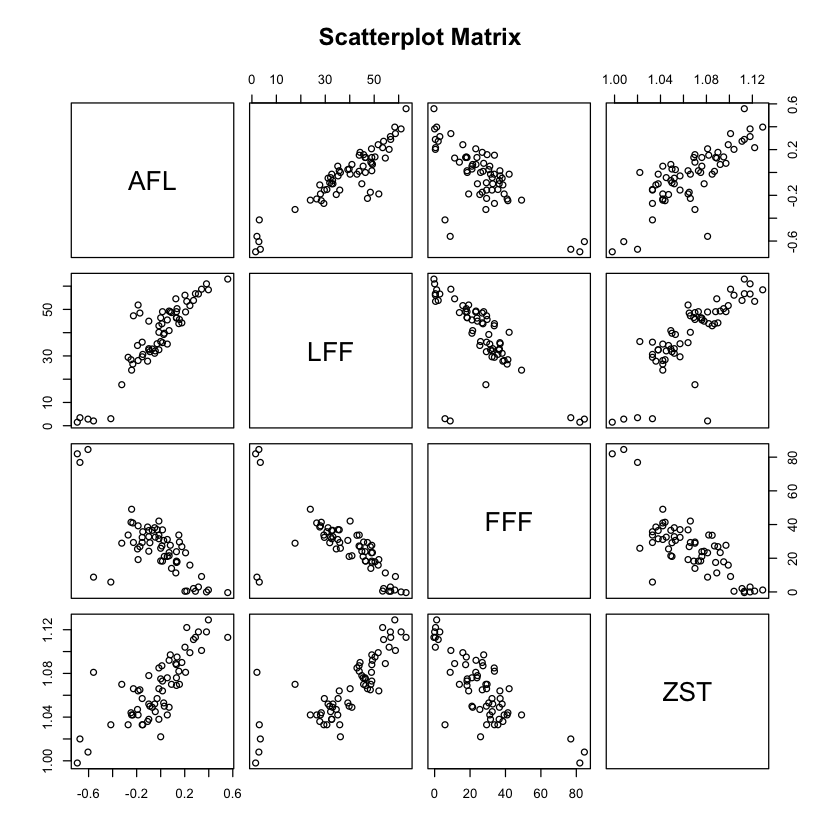

In [73]:
# Vẽ biểu đồ Scatterplot cho toàn bộ các cột dữ liệu
# options(repr.plot.width=20, repr.plot.height=7)
pairs(df, main = "Scatterplot Matrix")


In [74]:
lambdas <- eigenvalues$values
lambdas

[1] 11.29500861  0.10362052  0.03186923  0.00604974

- Từ bảng phân tích giá trị riêng ta thấy rằng, Trong bộ dữ liệu này chỉ có 1 trị riêng đầu tiên = 11.2950086114639 > 1 (đây là một trị riêng có giá trị rất lớn) là có ý nghĩa, các trị riêng còn lại đều < 1. Vậy ta có thể quyết định số nhân tố cần giữ lại = 1.


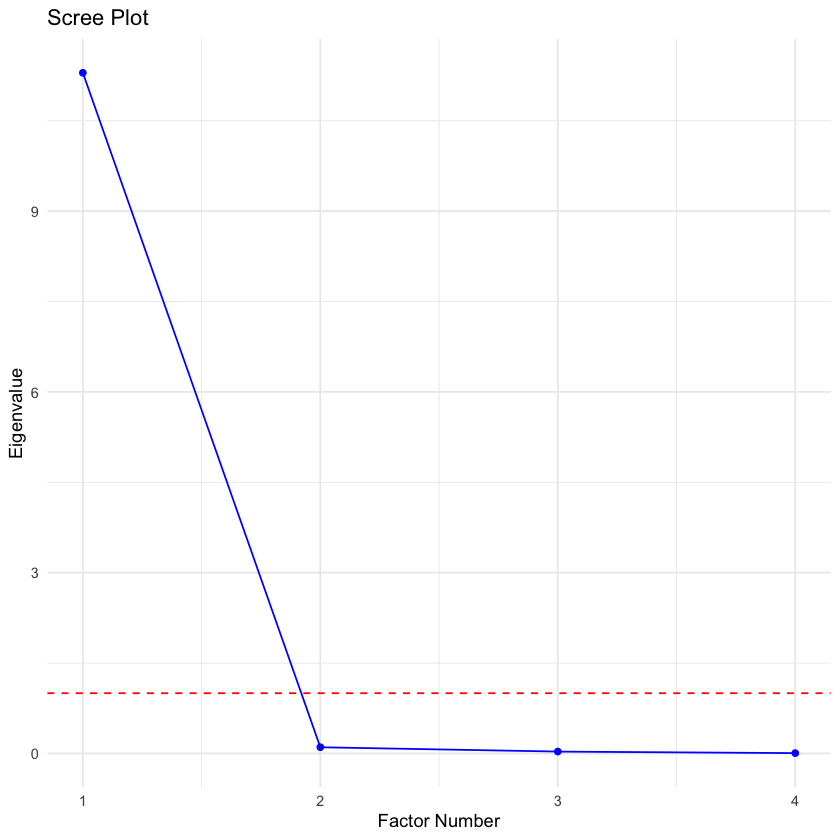

In [75]:
# Vẽ Scree plot để minh hoạ
# Tạo dataframe cho ggplot
eigen_df <- data.frame(Factor = 1:length(lambdas), Eigenvalue = lambdas)

# Vẽ biểu đồ Scree
ggplot(eigen_df, aes(x = Factor, y = Eigenvalue)) +
  geom_line(color = "blue") + # Vẽ đường nối các điểm
  geom_point(color = "blue") + # Vẽ các điểm
  geom_hline(yintercept = 1, linetype = "dashed", color = "red") + # Đường ngang tại giá trị riêng = 1
  labs(title = "Scree Plot", x = "Factor Number", y = "Eigenvalue") + # Tiêu đề và nhãn trục
  theme_minimal() # Chủ đề đồ họa


In [76]:
# Tỷ lệ tích luỹ (cumulative proportion):
cumsum(lambdas) / sum(lambdas)

[1] 0.9876239 0.9966844 0.9994710 1.0000000

In [77]:
# Factor loadings:
L <- cbind(
    sqrt(lambdas[1]) * eigenvalues$vectors[, 1]
    # sqrt(lambdas[2]) * eigenvalues$vectors[, 2]
)
L


2.8784542
0.6640048
1.4494165
0.6839584


#### Từ kết quả bảng L ta thấy rằng
- 2.8784542 (Biến thứ nhất): Giá trị này cho thấy biến đầu tiên có một mối quan hệ rất mạnh với nhân tố chung, gần như toàn bộ biến thiên của biến này có thể được giải thích bởi nhân tố này. Đây có thể là một đặc điểm chính hoặc một đặc tính rất quan trọng mà nhân tố đang cố gắng mô tả.
- 0.6640048 (Biến thứ hai): Tải nhân tố thấp hơn nhiều so với biến đầu tiên, cho thấy biến này chỉ được giải thích một phần bởi nhân tố chung. Có thể có các yếu tố khác ảnh hưởng đến biến này mà nhân tố này không bao hàm.
- 1.4494165 (Biến thứ ba): Tải nhân tố này cho thấy biến này cũng có một mối quan hệ tương đối mạnh với nhân tố chung, tuy nhiên không mạnh bằng biến đầu tiên. Điều này chỉ ra rằng nhân tố này giải thích một lượng đáng kể biến thiên của biến này.
- 0.6839584 (Biến thứ tư): Tương tự như biến thứ hai, mối quan hệ giữa biến này và nhân tố chung là có nhưng không mạnh, cho thấy nhân tố này chỉ giải thích một phần nhỏ biến thiên của biến.

#### Ý Nghĩa Tổng Quát
Nhân tố duy nhất trong phân tích này đã giải thích được 98.762393226259% trên tổng biến thiên của dữ liệu.


#### Phương pháp hợp lý cực đại

In [78]:
ftmodel <- factanal(df, factors = 1, rotation = "none")
ftmodel



Call:
factanal(x = df, factors = 1, rotation = "none")

Uniquenesses:
  AFL   LFF   FFF   ZST 
0.100 0.106 0.386 0.283 

Loadings:
    Factor1
AFL  0.949 
LFF  0.945 
FFF -0.784 
ZST  0.846 

               Factor1
SS loadings      3.125
Proportion Var   0.781

Test of the hypothesis that 1 factor is sufficient.
The chi square statistic is 10.78 on 2 degrees of freedom.
The p-value is 0.00455 

##### Từ kết quả của phân tích nhân tố sử dụng phương pháp hợp lý cực đại ta thấy:
- Độc Lập (Uniquenesses): Độc lập cho biết phần trăm biến thiên của mỗi biến không được giải thích bởi nhân tố được mô hình hóa. Các giá trị độc lập cho từng biến:
    - AFL: 0.100 - Nhân tố này giải thích 90% biến thiên của biến, chỉ có 10% là độc lập.
    - LFF: 0.106 - Tương tự, nhân tố giải thích khoảng 89.4% biến thiên của biến.
    - FFF: 0.386 - Nhân tố giải thích 61.4% biến thiên của biến, 38.6% còn lại là độc lập.
    - ZST: 0.283 - Nhân tố giải thích 71.7% biến thiên của biến, 28.3% là độc lập.
- Tải Nhân Tố (Loadings): Tải nhân tố cho biết mức độ mà mỗi biến liên kết với nhân tố duy nhất được rút ra:

    - AFL: 0.949 - Mối liên kết mạnh mẽ với nhân tố.
    - LFF: 0.945 - Mối liên kết mạnh mẽ với nhân tố, tương tự như AFL.
    - FFF: -0.784 - Mối liên kết mạnh mẽ nhưng tiêu cực với nhân tố, cho thấy sự tương phản về ảnh hưởng so với các biến khác.
    - ZST: 0.846 - Mối liên kết mạnh với nhân tố.
- Tổng Hợp Tải Nhân Tố và Biến Thiên:
    - SS loadings (Tổng bình phương tải nhân tố): 3.125 - Tổng đóng góp của các tải nhân tố bình phương lên nhân tố, cho thấy mức độ biến thiên mà nhân tố này giải thích.
    - Proportion Var (Tỷ lệ biến thiên): 0.781 - Nhân tố này giải thích được 78.1% tổng biến thiên trong dữ liệu.